In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [139]:
sns.set_style("whitegrid")

### Part 1: Data Pre-processing

In [140]:
df = pd.read_csv("../resources/data/discords/gesture/ann_gun_CentroidA.txt",header=None, delim_whitespace=True)
df['anomaly'] = 0
df

0          1  anomaly
0      196.37467  394.45875        0
1      196.49124  394.03080        0
2      196.79989  394.24107        0
3      197.17570  394.16833        0
4      197.87943  393.21259        0
...          ...        ...      ...
11246  267.76306  387.28401        0
11247  268.23960  387.10603        0
11248  268.43117  387.11377        0
11249  268.64035  387.14087        0
11250  268.86282  386.98298        0

[11251 rows x 3 columns]

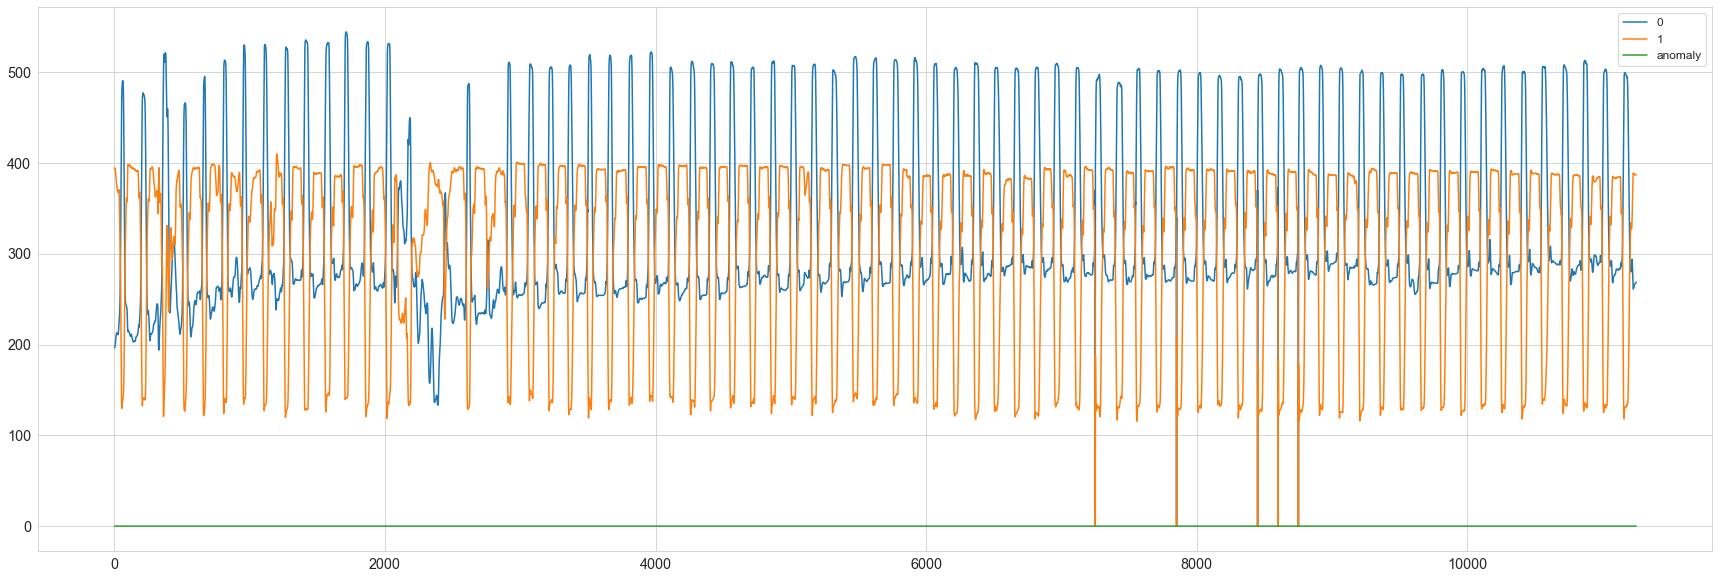

In [141]:
df.plot(figsize=(30,10))
plt.show()

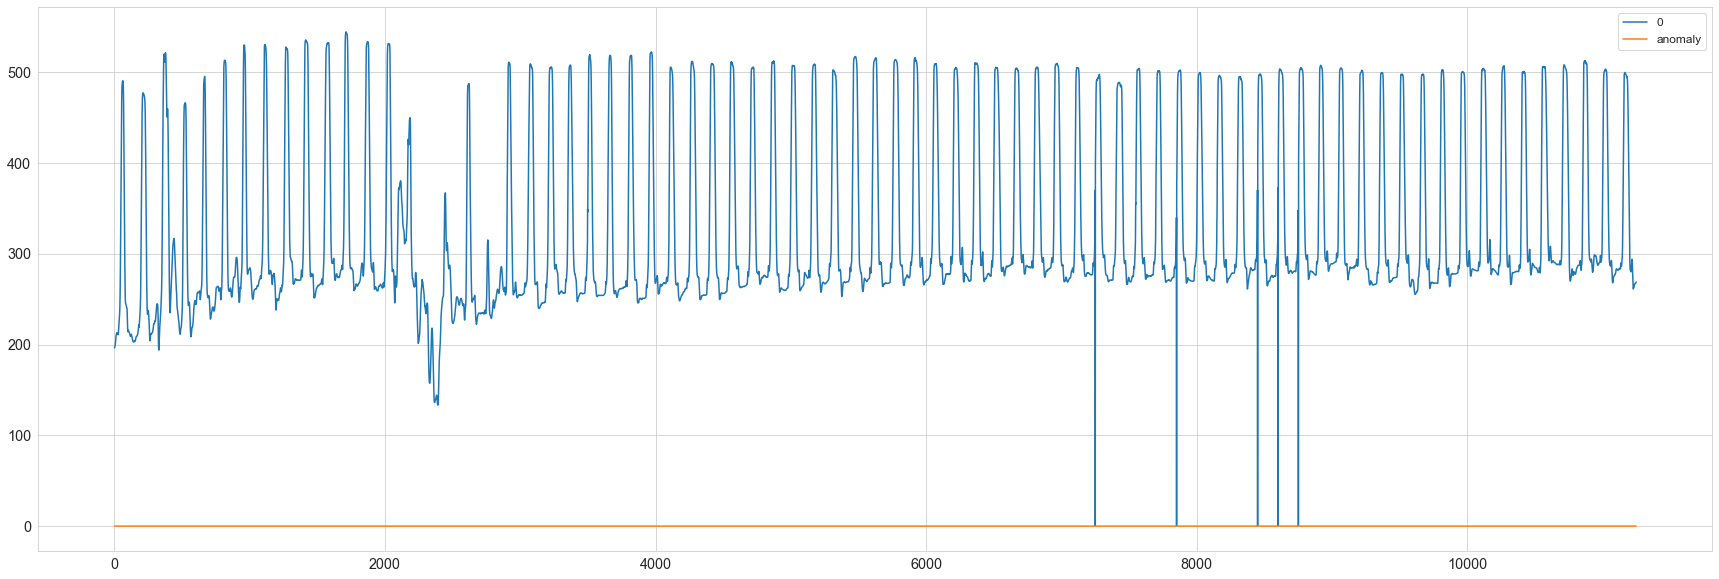

In [142]:
df1 = df.iloc[:,[0,2]]
df1.plot(figsize=(30,10))
plt.show()

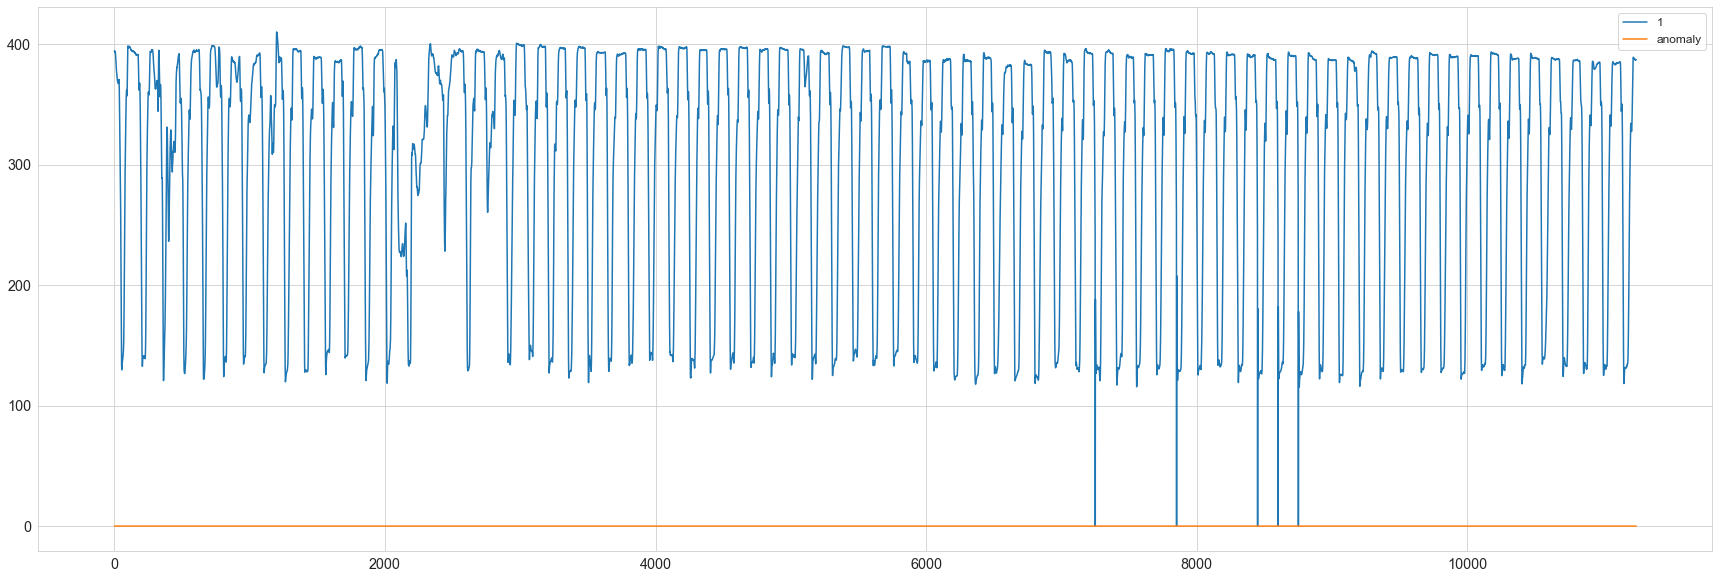

In [143]:
df2 = df.iloc[:,[1,2]]
df2.plot(figsize=(30,10))
plt.show()

<Figure size 720x360 with 0 Axes>

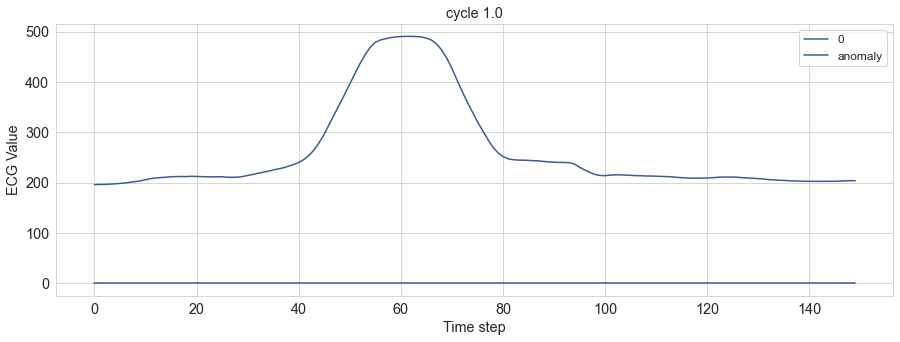

<Figure size 720x360 with 0 Axes>

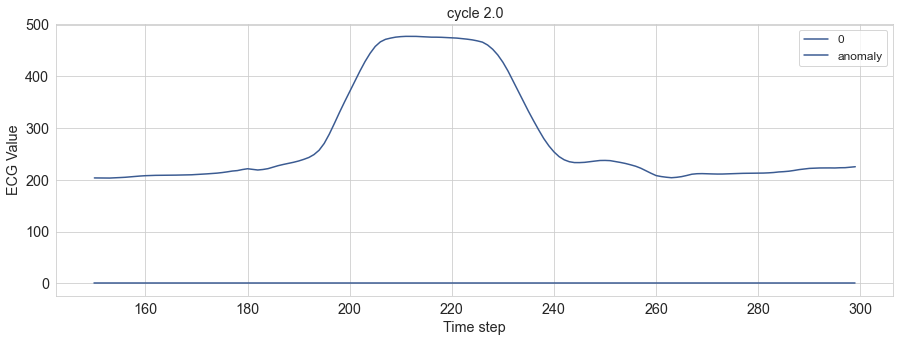

<Figure size 720x360 with 0 Axes>

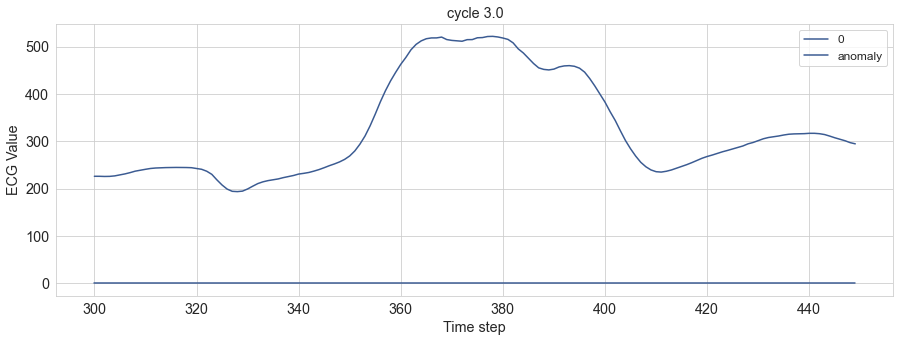

<Figure size 720x360 with 0 Axes>

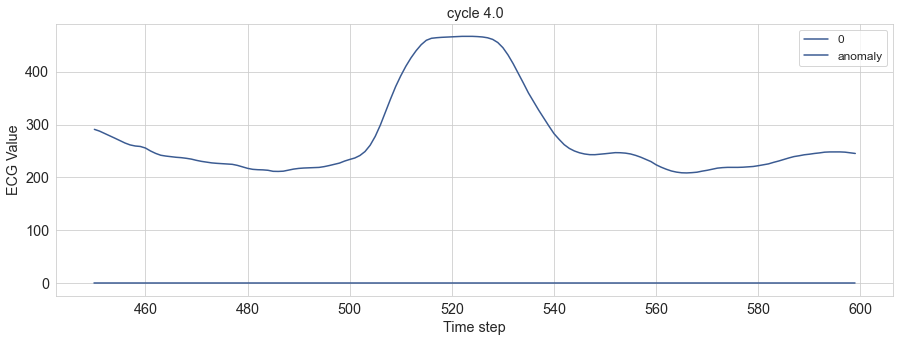

<Figure size 720x360 with 0 Axes>

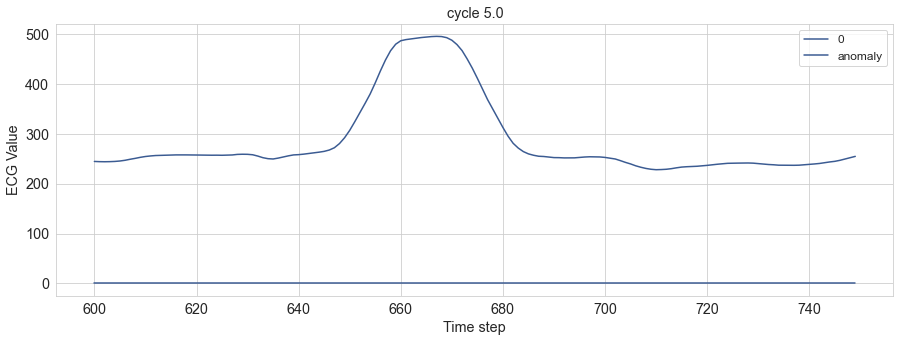

<Figure size 720x360 with 0 Axes>

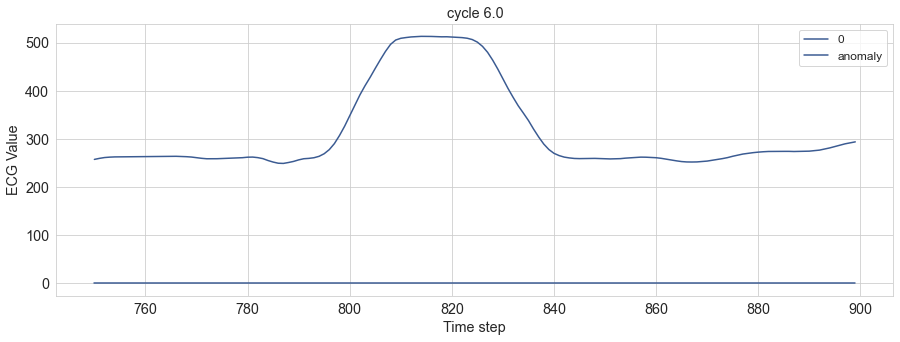

<Figure size 720x360 with 0 Axes>

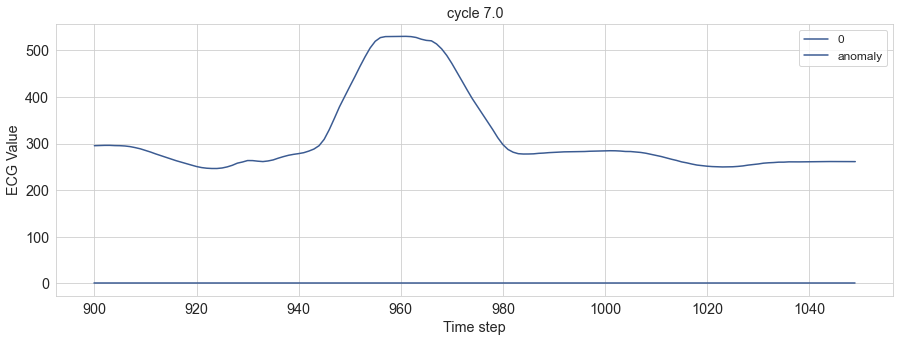

<Figure size 720x360 with 0 Axes>

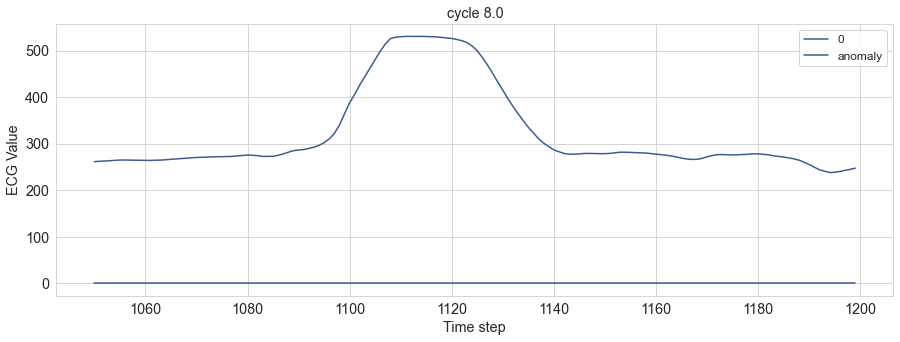

<Figure size 720x360 with 0 Axes>

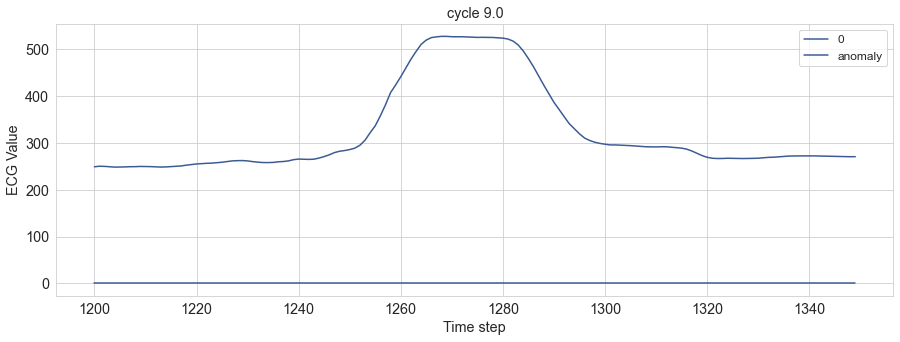

<Figure size 720x360 with 0 Axes>

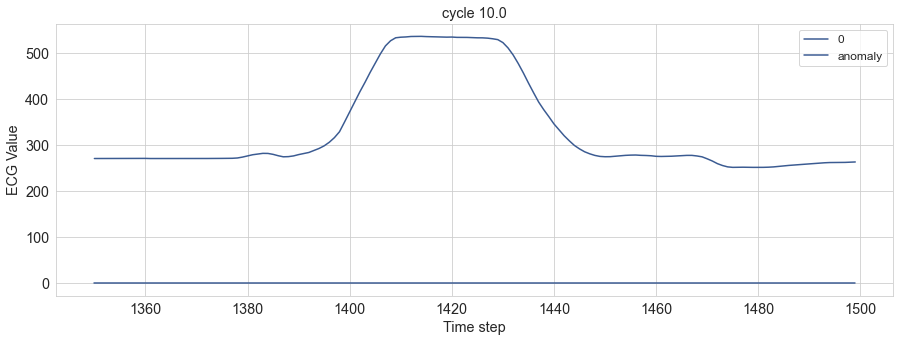

<Figure size 720x360 with 0 Axes>

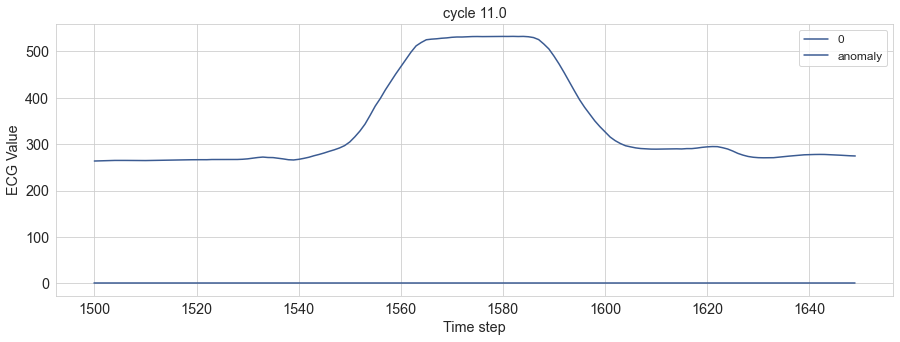

<Figure size 720x360 with 0 Axes>

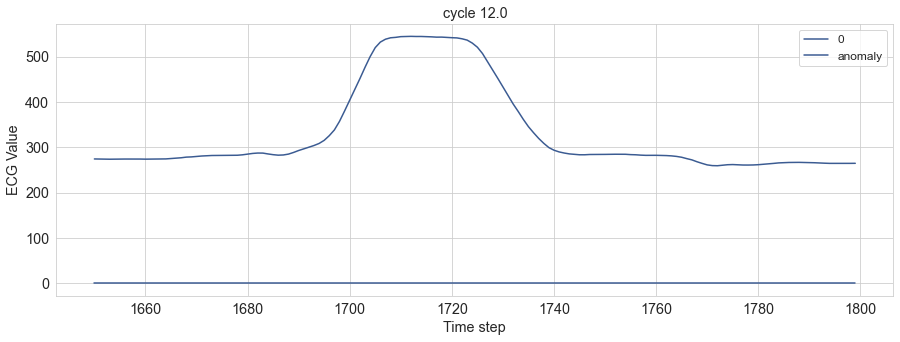

<Figure size 720x360 with 0 Axes>

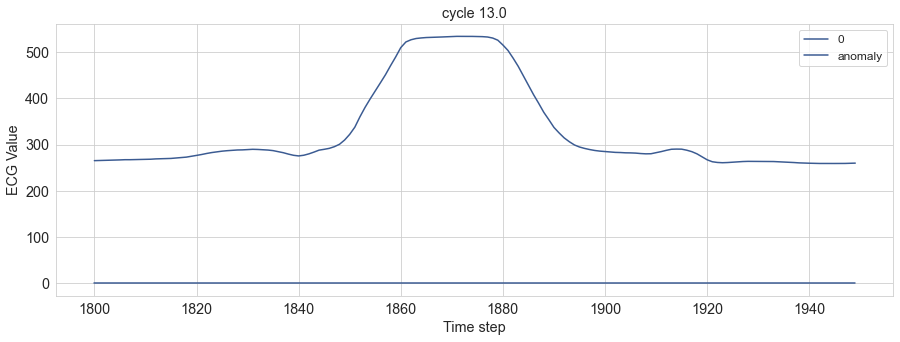

<Figure size 720x360 with 0 Axes>

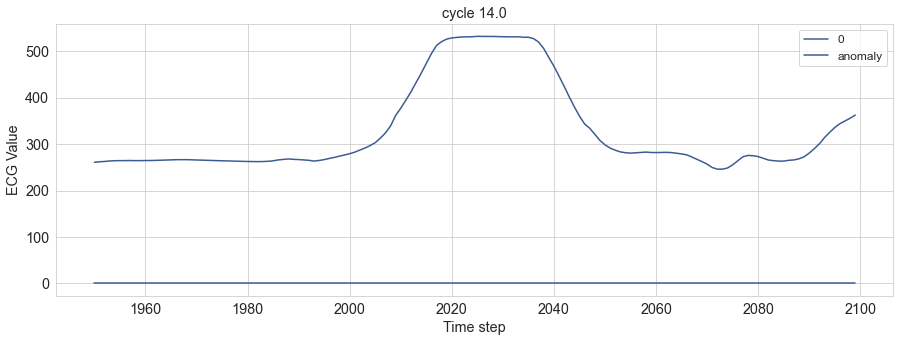

<Figure size 720x360 with 0 Axes>

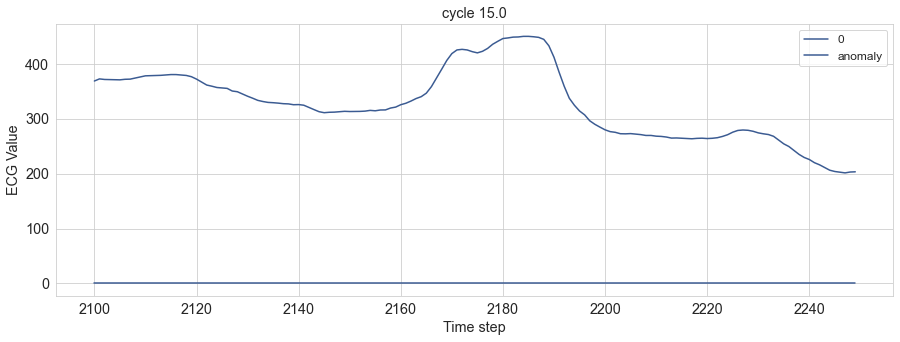

<Figure size 720x360 with 0 Axes>

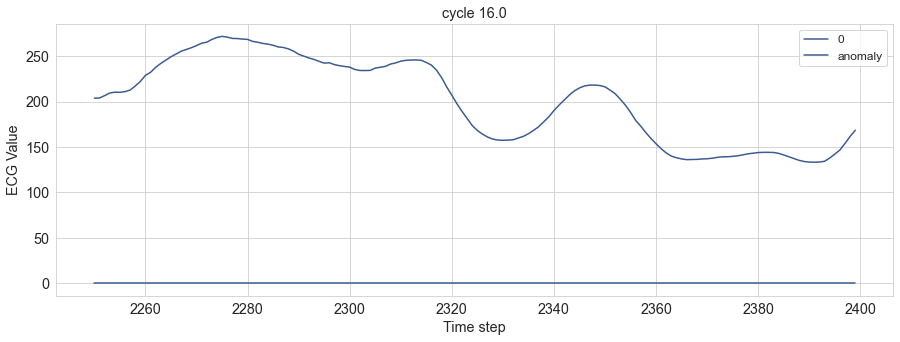

<Figure size 720x360 with 0 Axes>

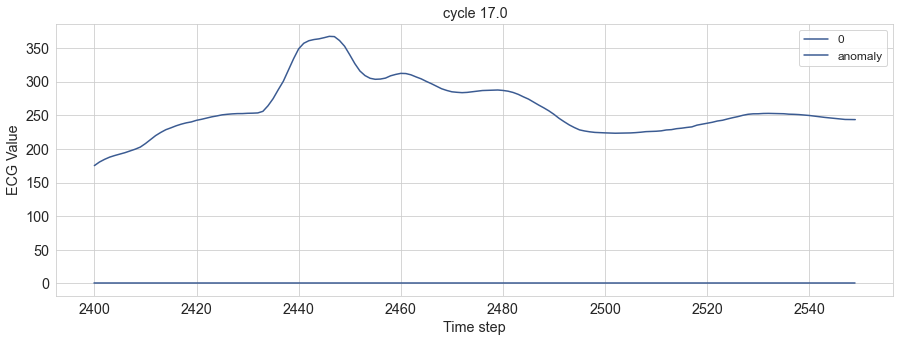

<Figure size 720x360 with 0 Axes>

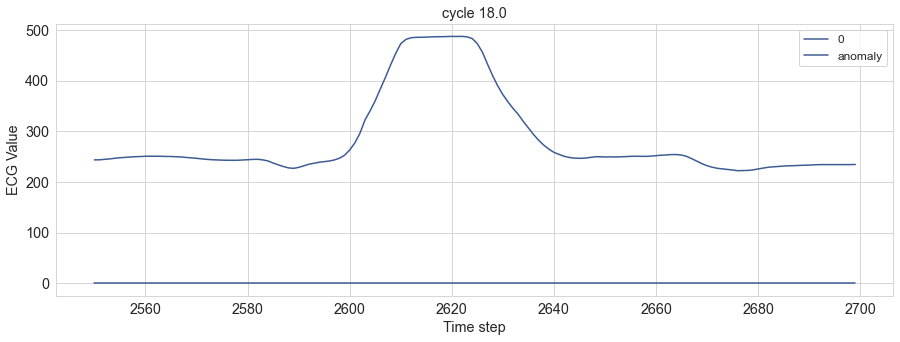

<Figure size 720x360 with 0 Axes>

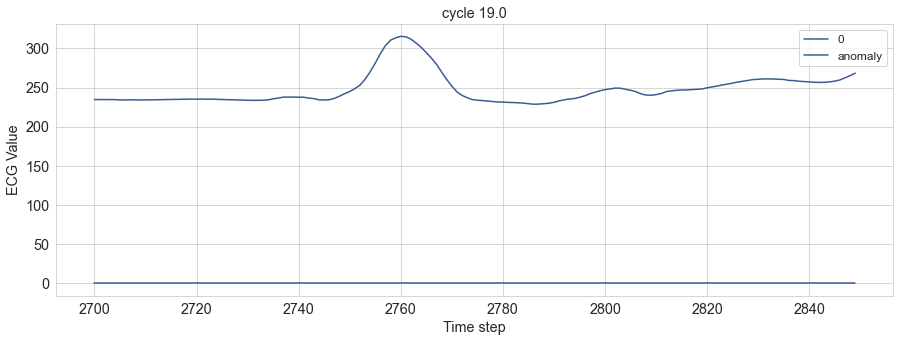

<Figure size 720x360 with 0 Axes>

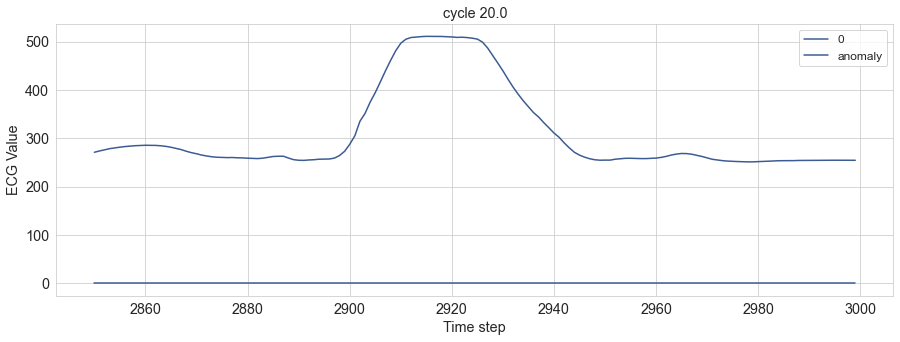

<Figure size 720x360 with 0 Axes>

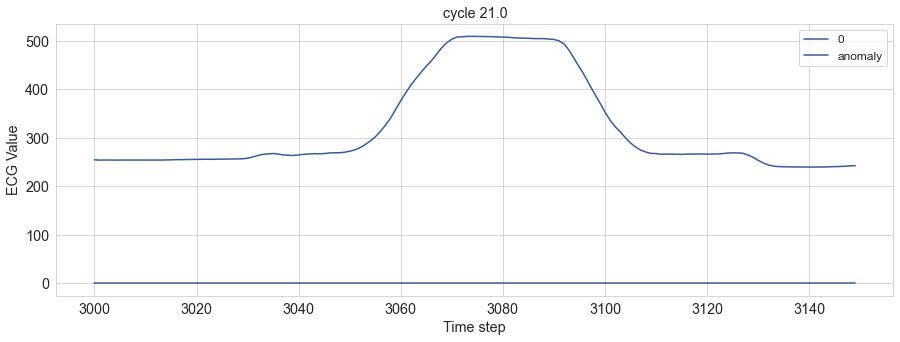

<Figure size 720x360 with 0 Axes>

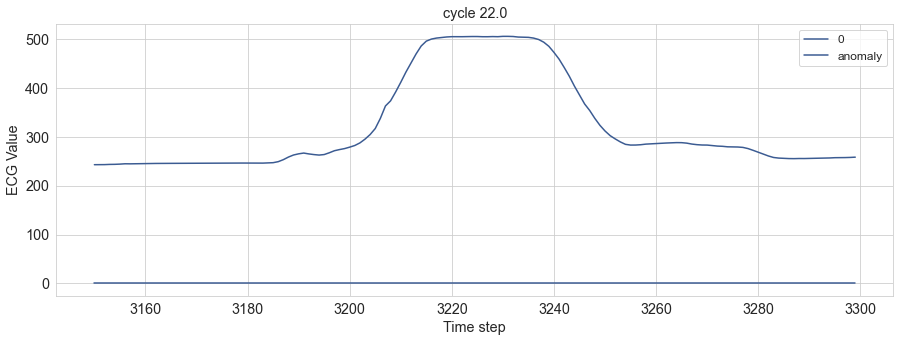

<Figure size 720x360 with 0 Axes>

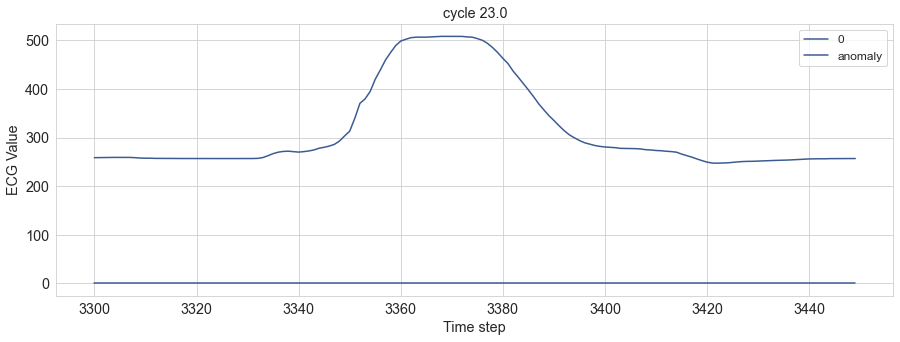

<Figure size 720x360 with 0 Axes>

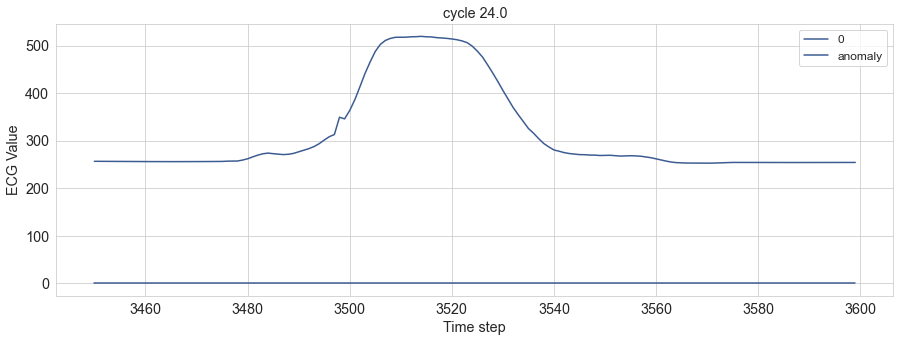

<Figure size 720x360 with 0 Axes>

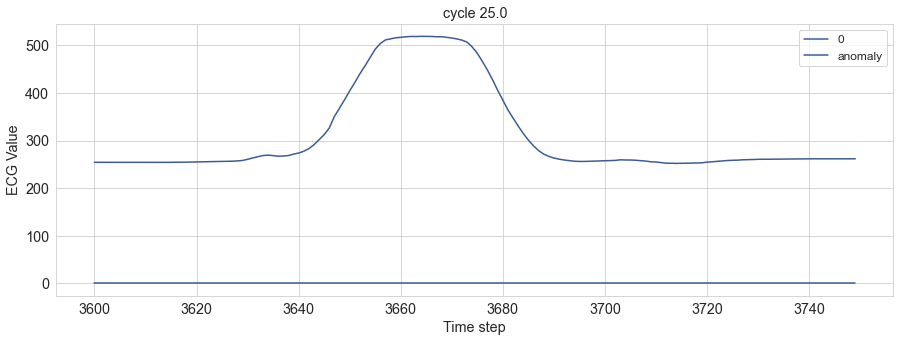

<Figure size 720x360 with 0 Axes>

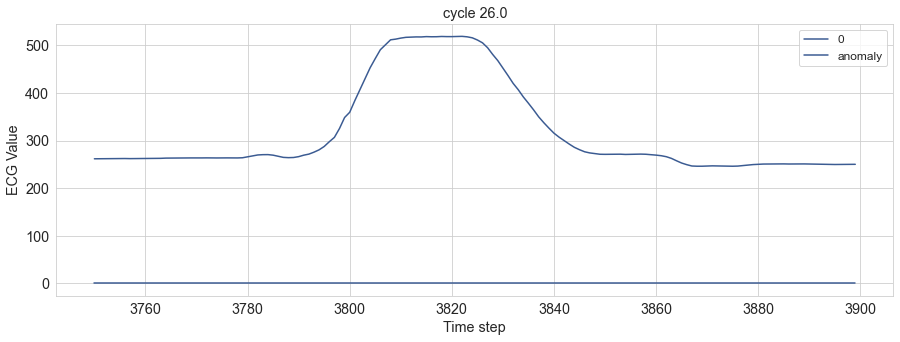

<Figure size 720x360 with 0 Axes>

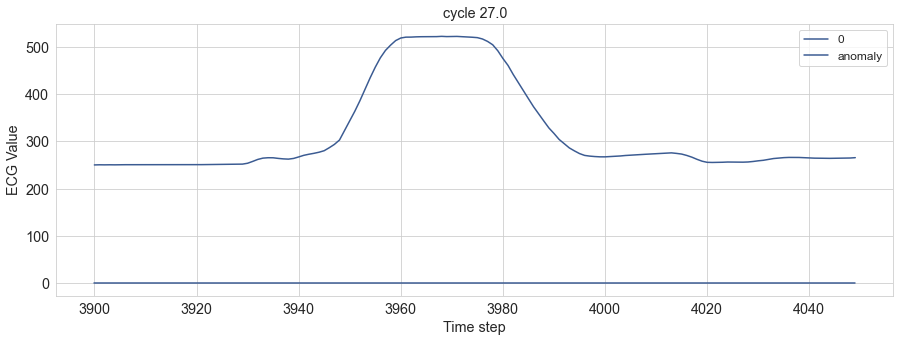

<Figure size 720x360 with 0 Axes>

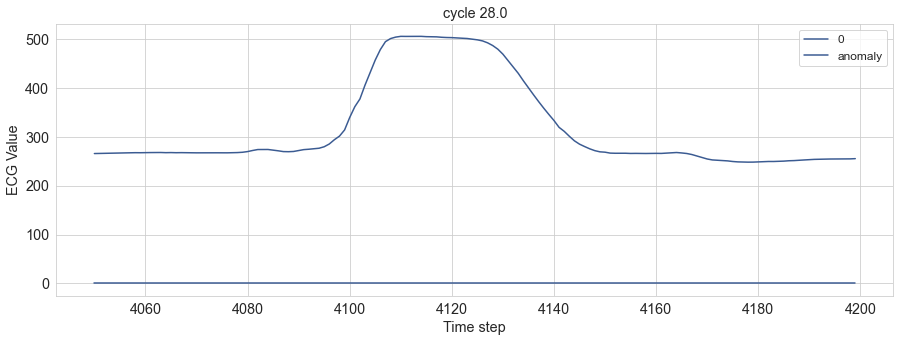

<Figure size 720x360 with 0 Axes>

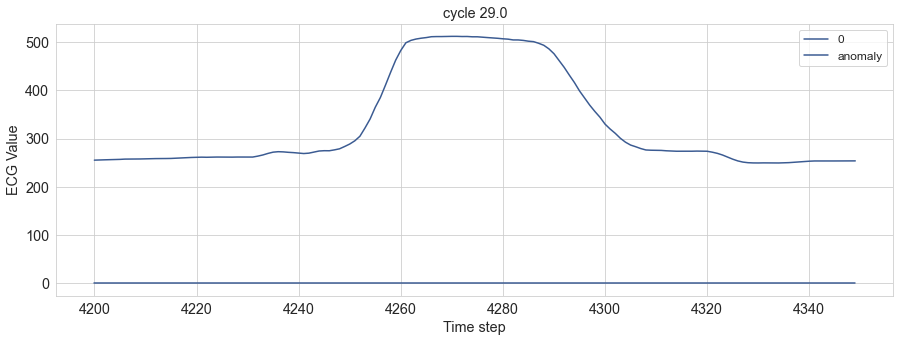

<Figure size 720x360 with 0 Axes>

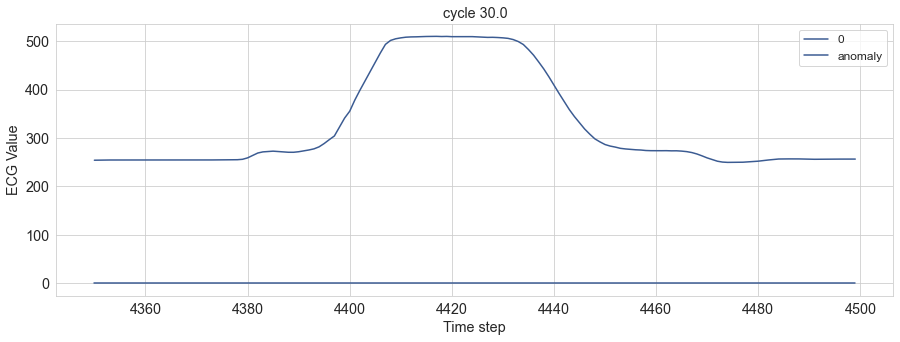

<Figure size 720x360 with 0 Axes>

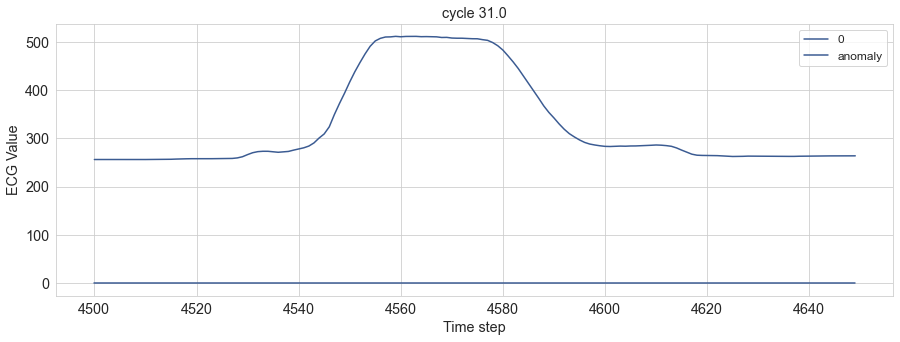

<Figure size 720x360 with 0 Axes>

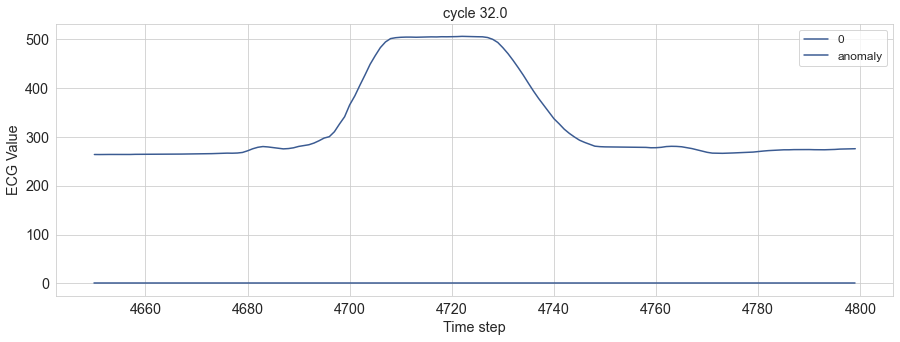

<Figure size 720x360 with 0 Axes>

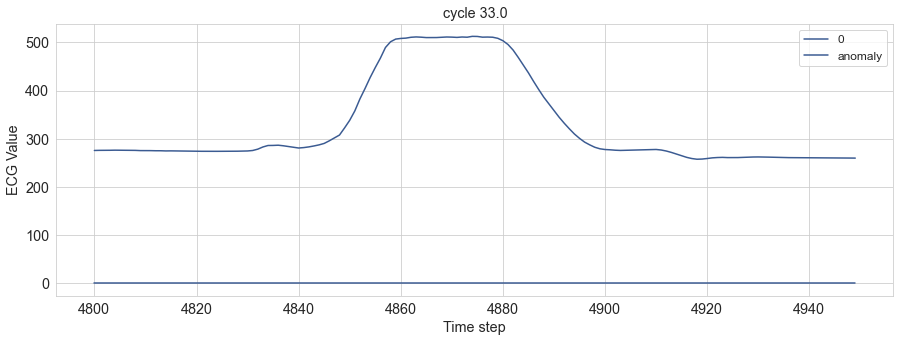

<Figure size 720x360 with 0 Axes>

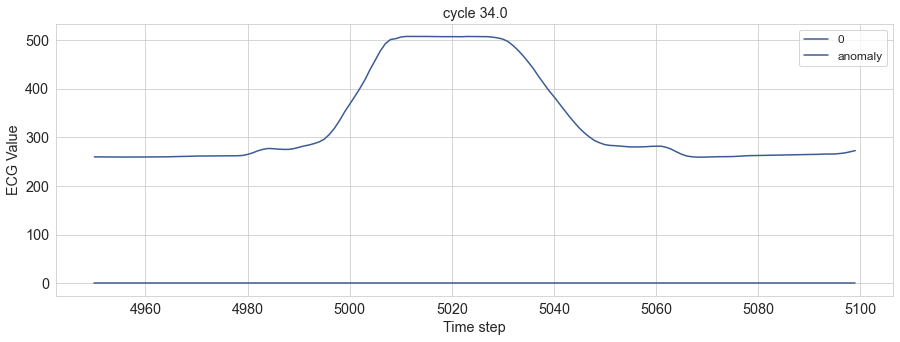

<Figure size 720x360 with 0 Axes>

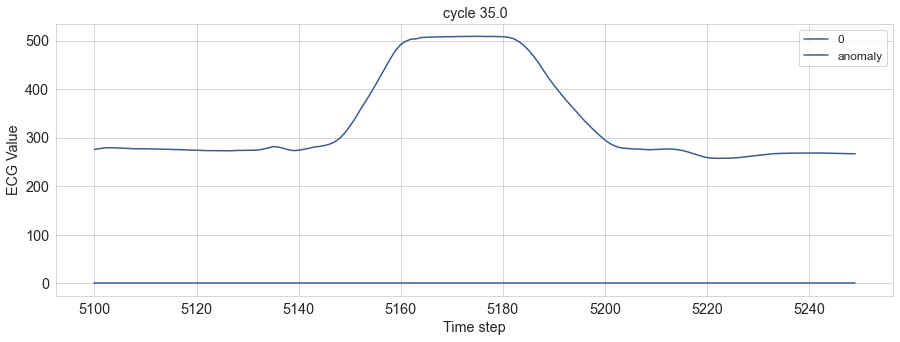

<Figure size 720x360 with 0 Axes>

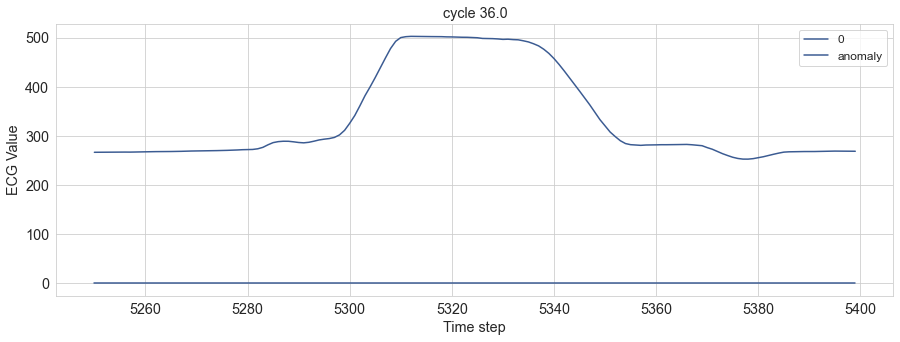

<Figure size 720x360 with 0 Axes>

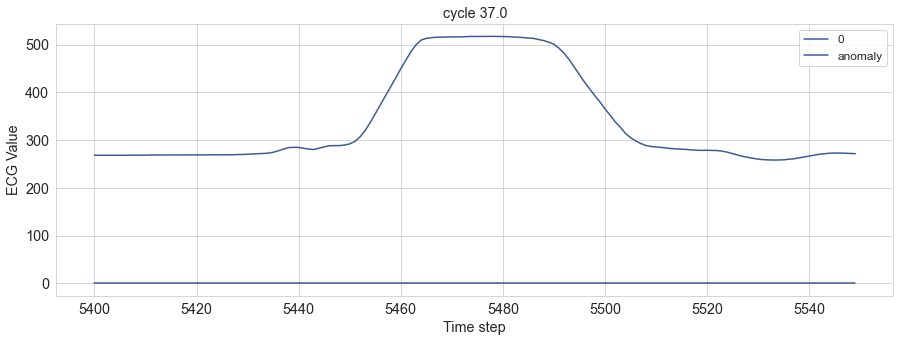

<Figure size 720x360 with 0 Axes>

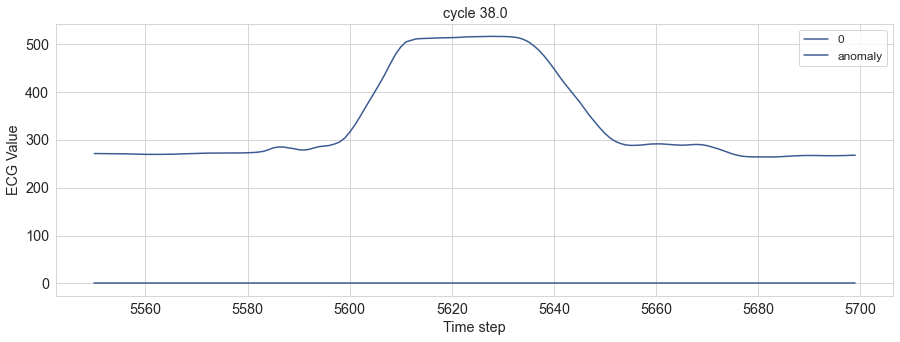

<Figure size 720x360 with 0 Axes>

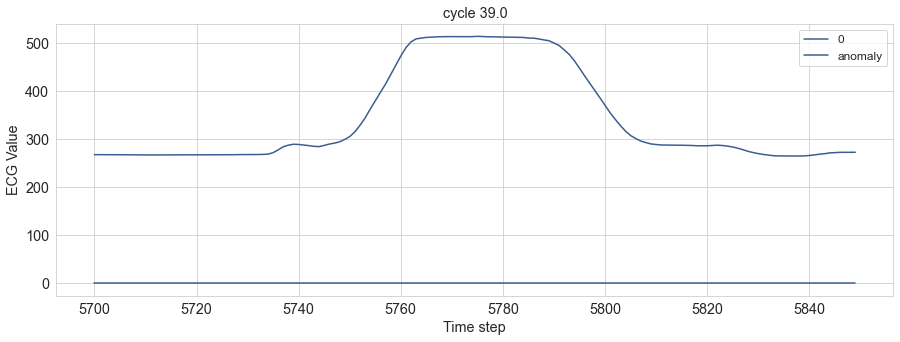

<Figure size 720x360 with 0 Axes>

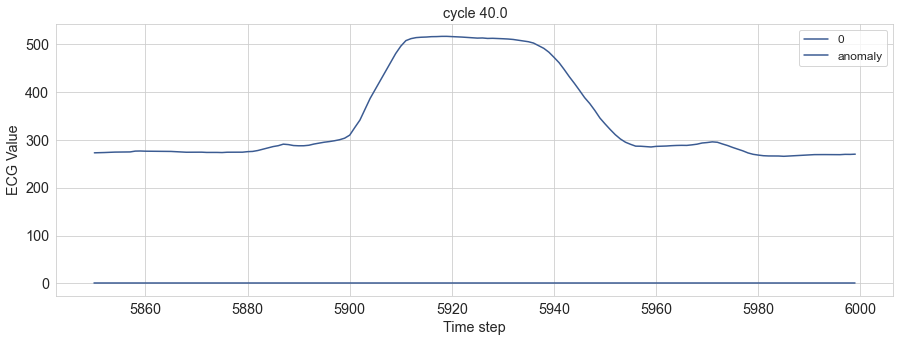

<Figure size 720x360 with 0 Axes>

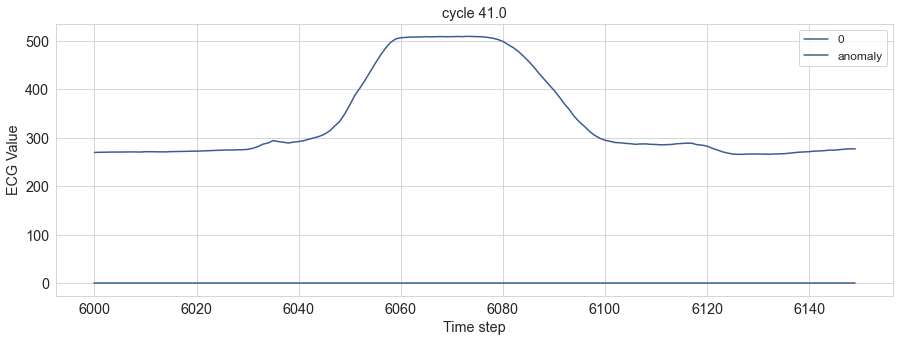

<Figure size 720x360 with 0 Axes>

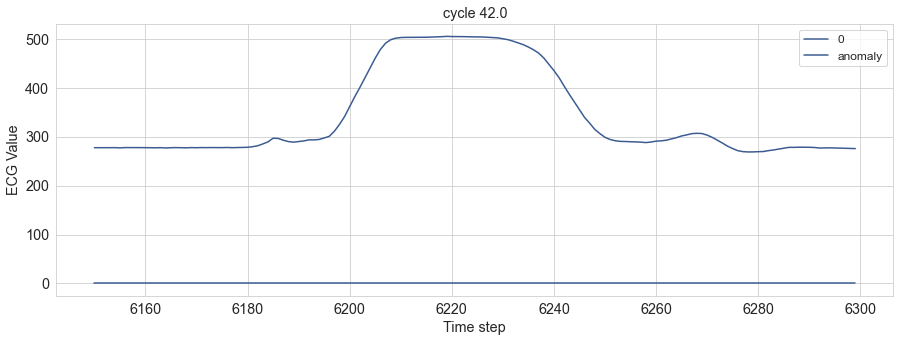

<Figure size 720x360 with 0 Axes>

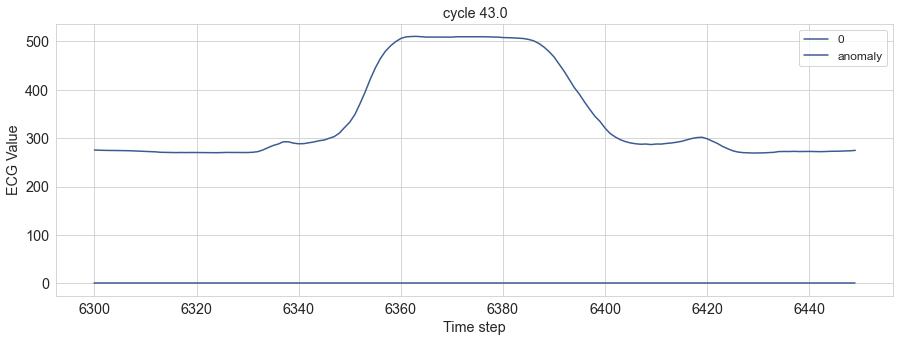

<Figure size 720x360 with 0 Axes>

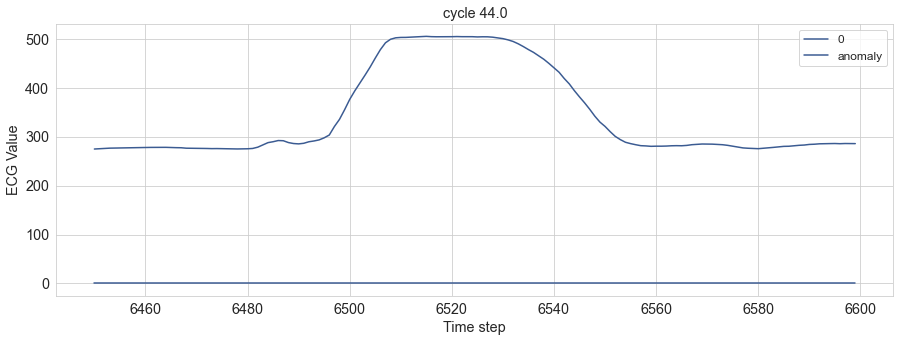

<Figure size 720x360 with 0 Axes>

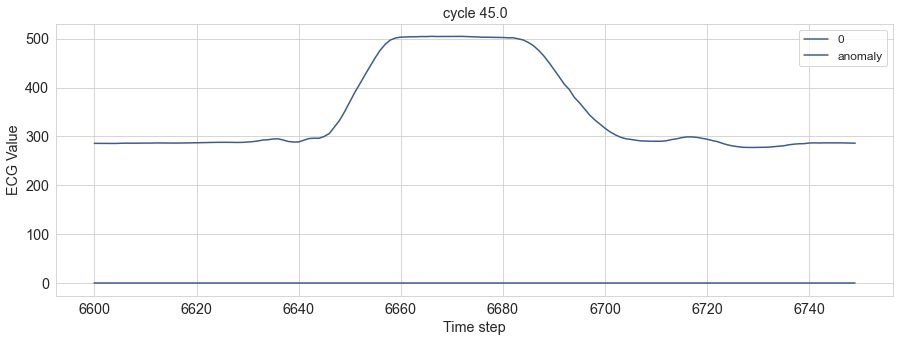

<Figure size 720x360 with 0 Axes>

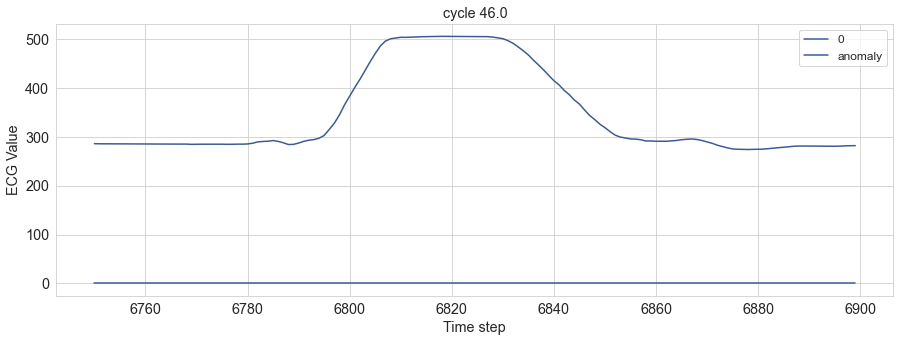

<Figure size 720x360 with 0 Axes>

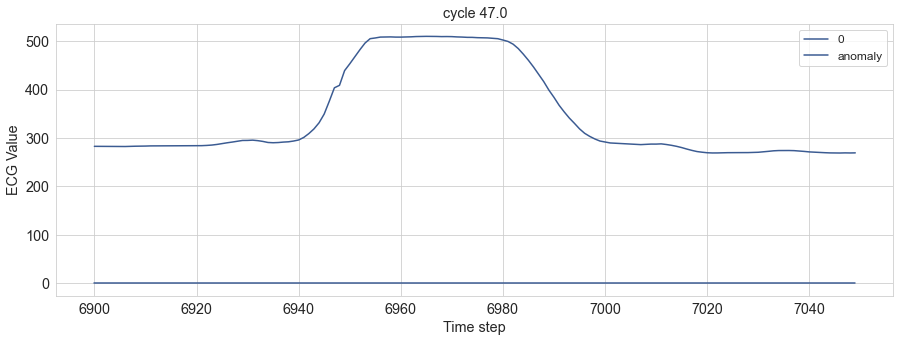

<Figure size 720x360 with 0 Axes>

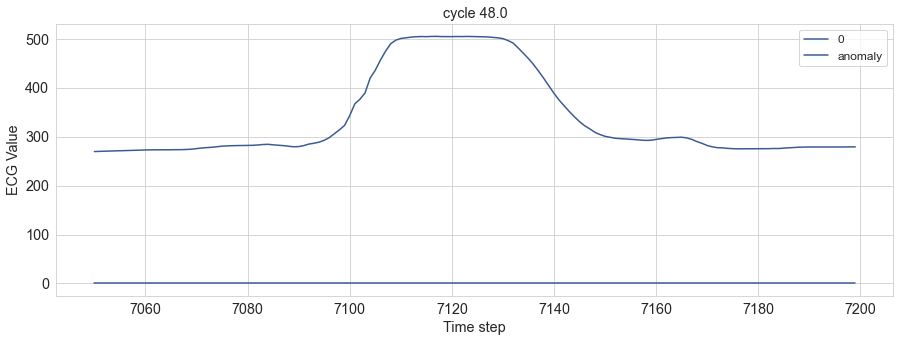

<Figure size 720x360 with 0 Axes>

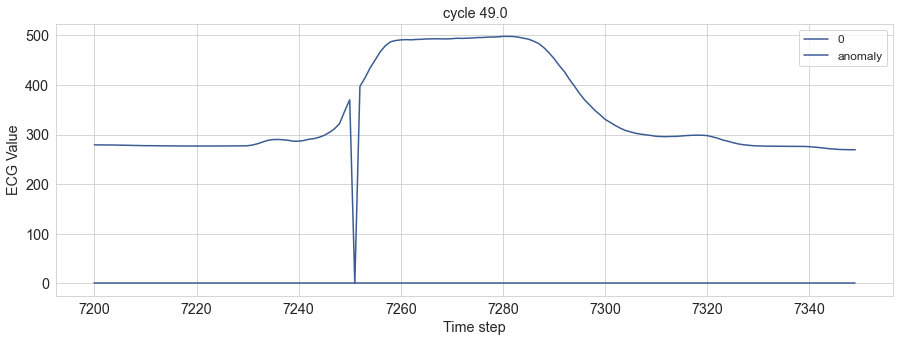

<Figure size 720x360 with 0 Axes>

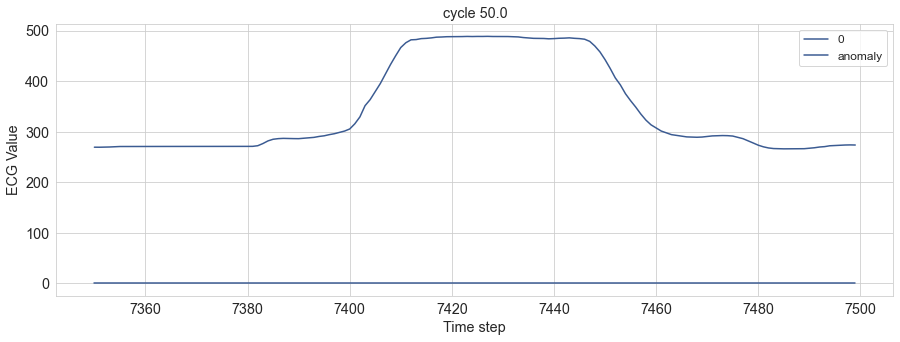

<Figure size 720x360 with 0 Axes>

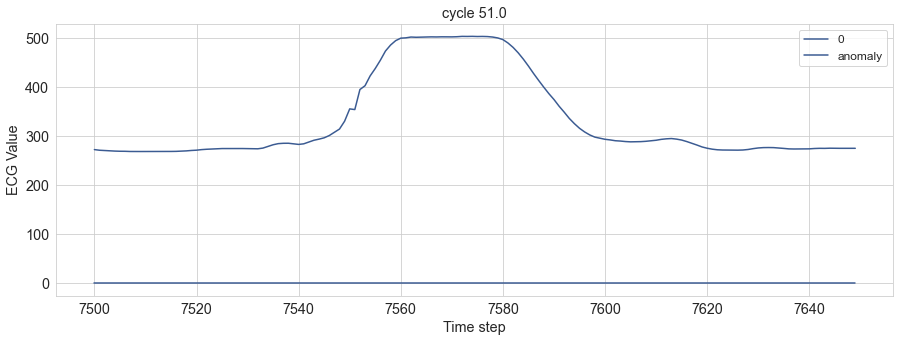

<Figure size 720x360 with 0 Axes>

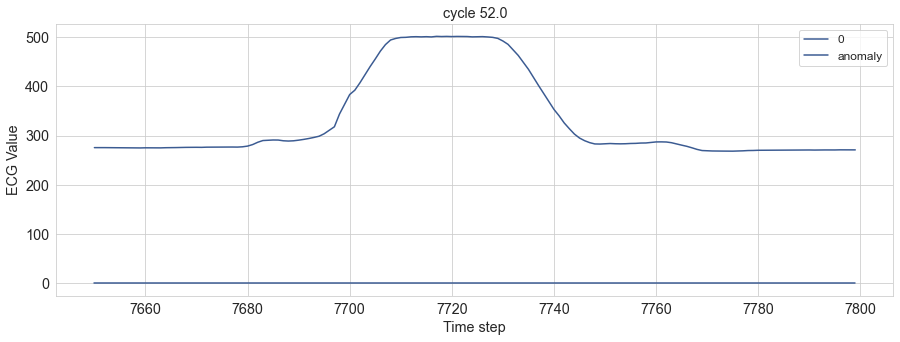

<Figure size 720x360 with 0 Axes>

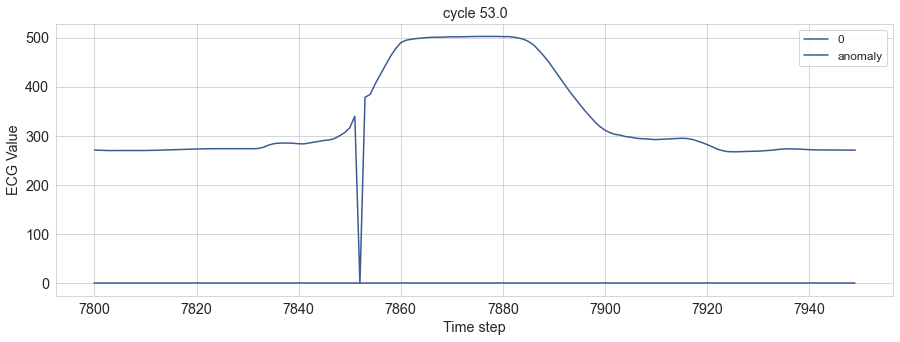

<Figure size 720x360 with 0 Axes>

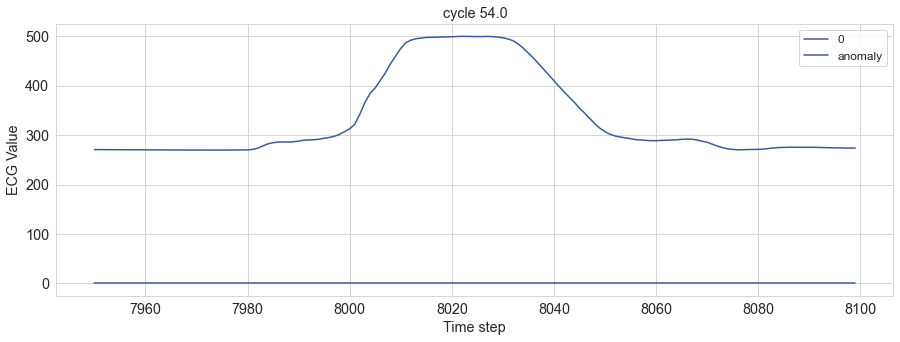

<Figure size 720x360 with 0 Axes>

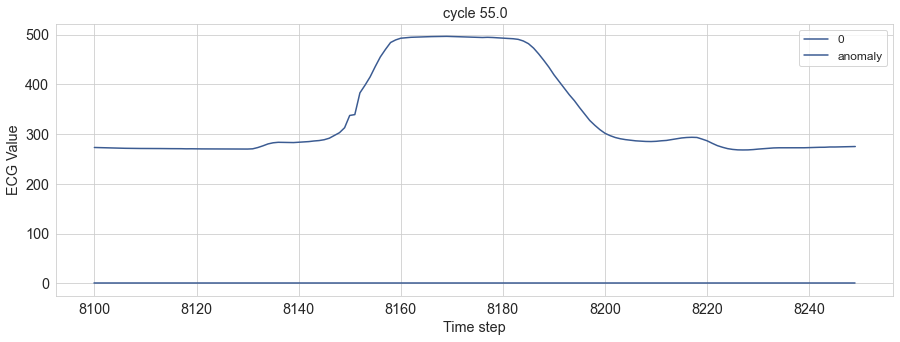

<Figure size 720x360 with 0 Axes>

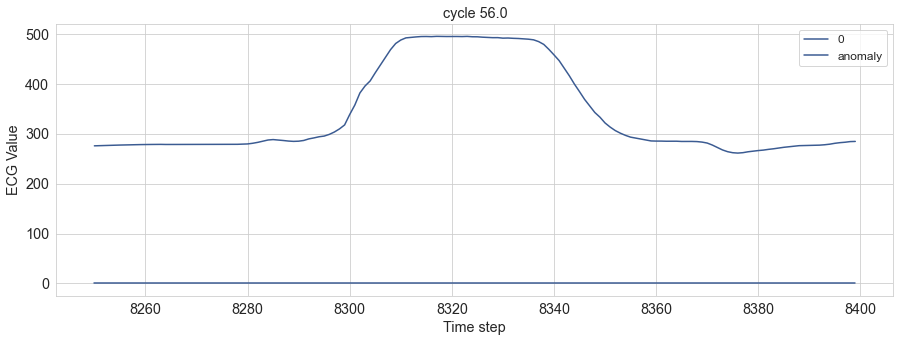

<Figure size 720x360 with 0 Axes>

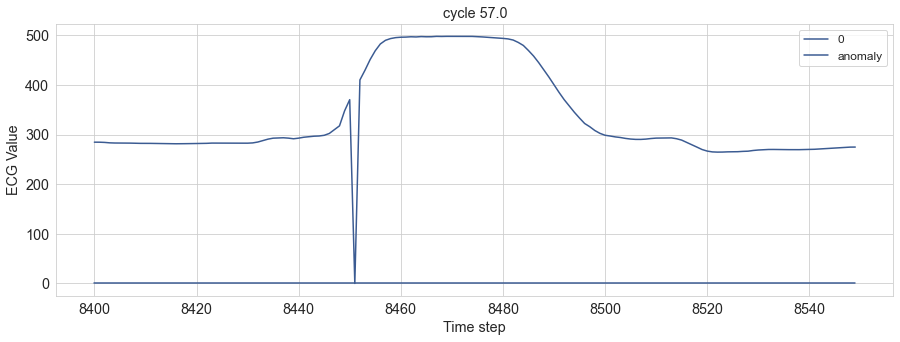

<Figure size 720x360 with 0 Axes>

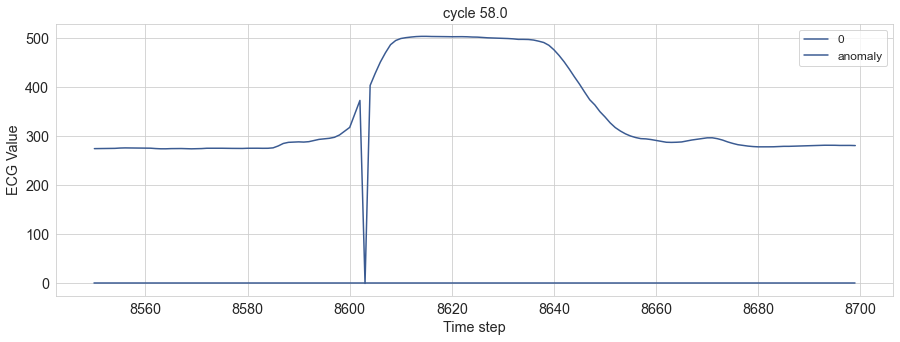

<Figure size 720x360 with 0 Axes>

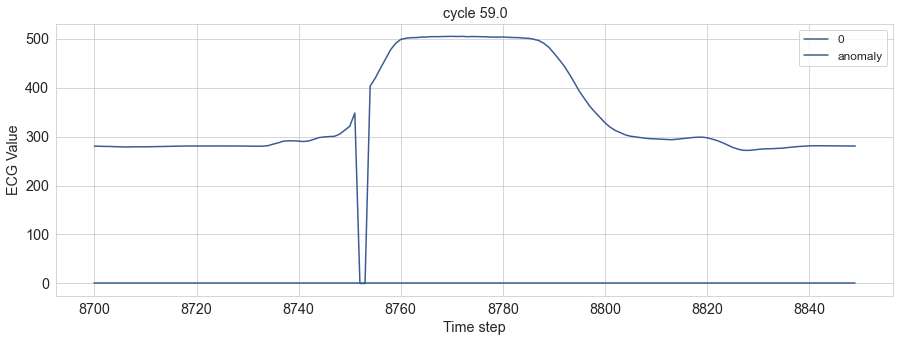

<Figure size 720x360 with 0 Axes>

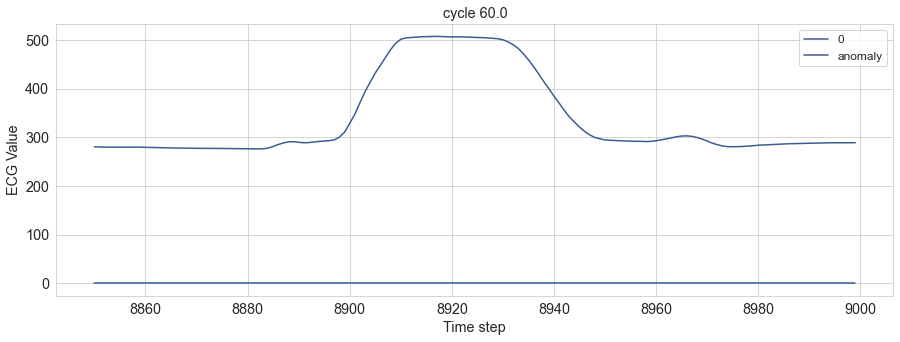

<Figure size 720x360 with 0 Axes>

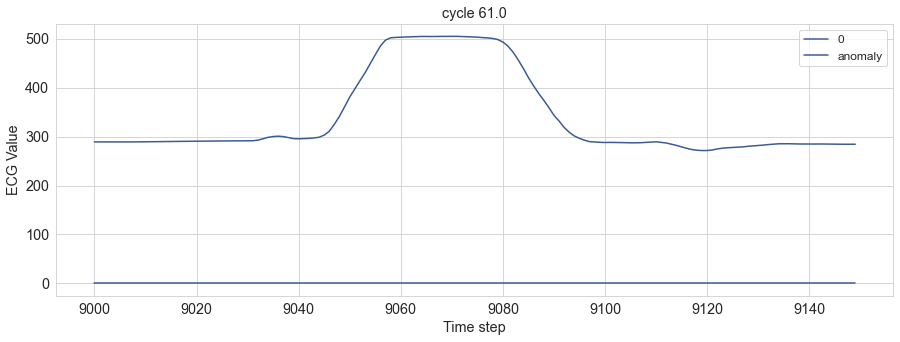

<Figure size 720x360 with 0 Axes>

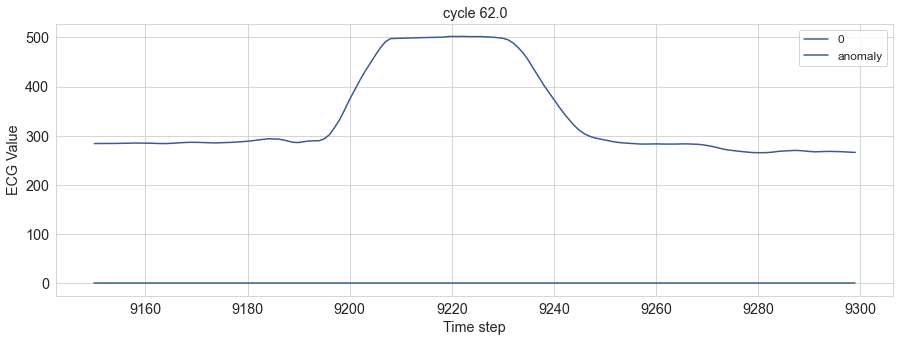

<Figure size 720x360 with 0 Axes>

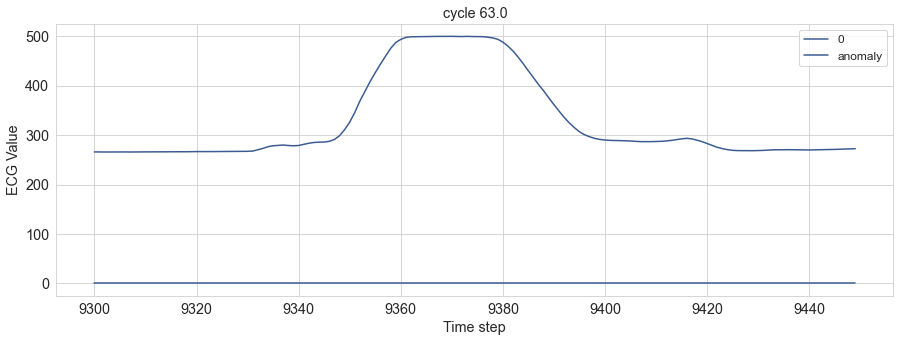

<Figure size 720x360 with 0 Axes>

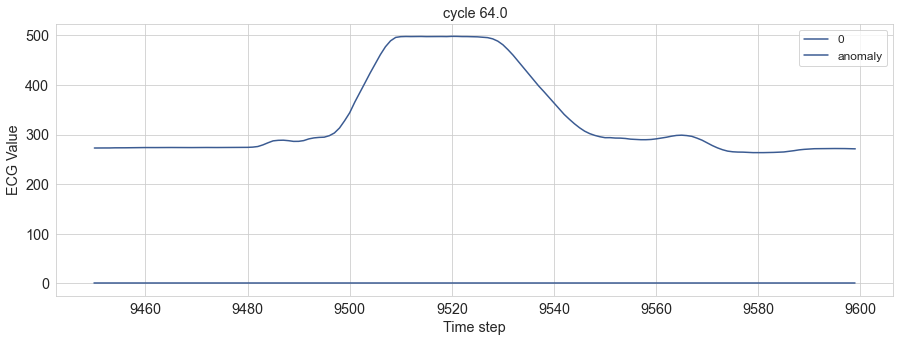

<Figure size 720x360 with 0 Axes>

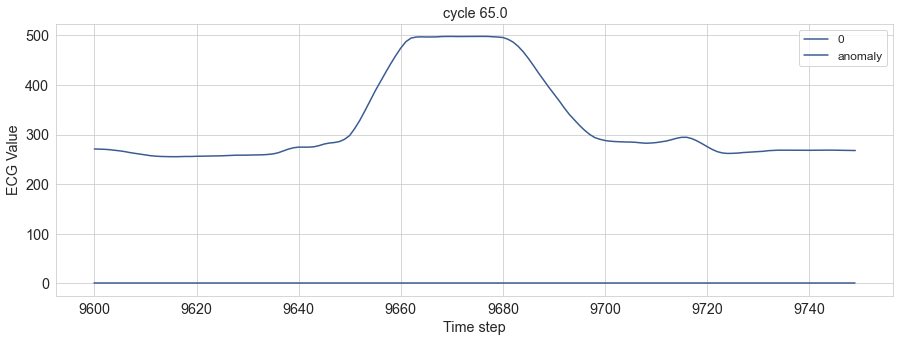

<Figure size 720x360 with 0 Axes>

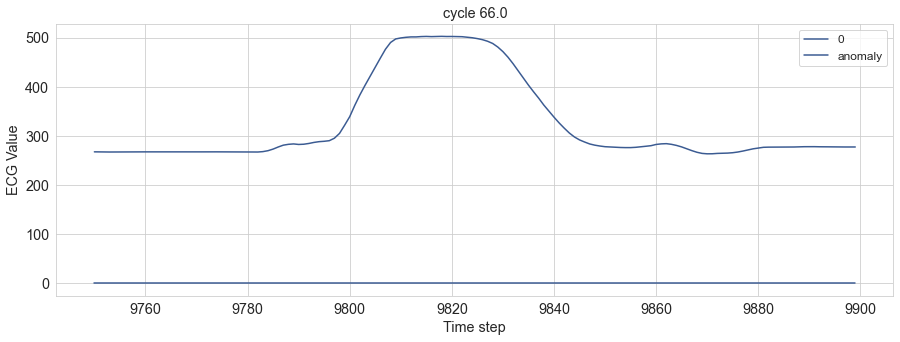

<Figure size 720x360 with 0 Axes>

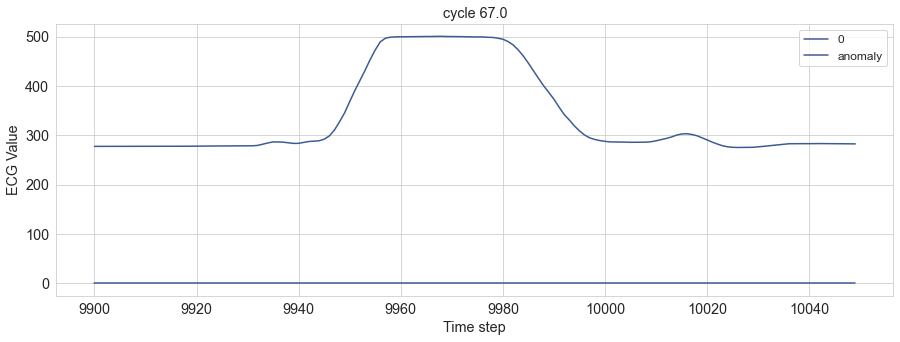

<Figure size 720x360 with 0 Axes>

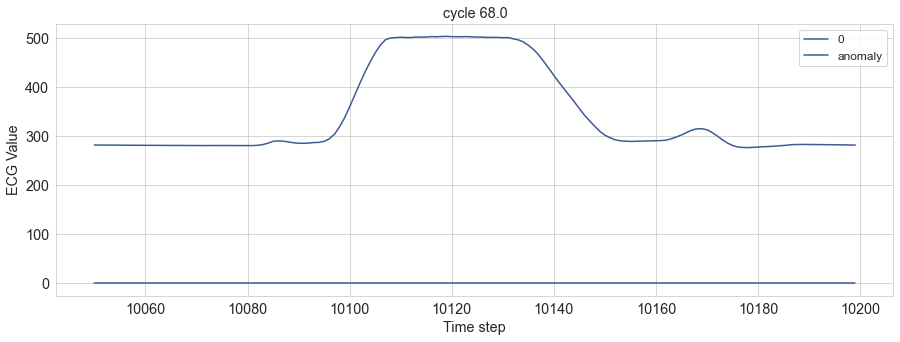

<Figure size 720x360 with 0 Axes>

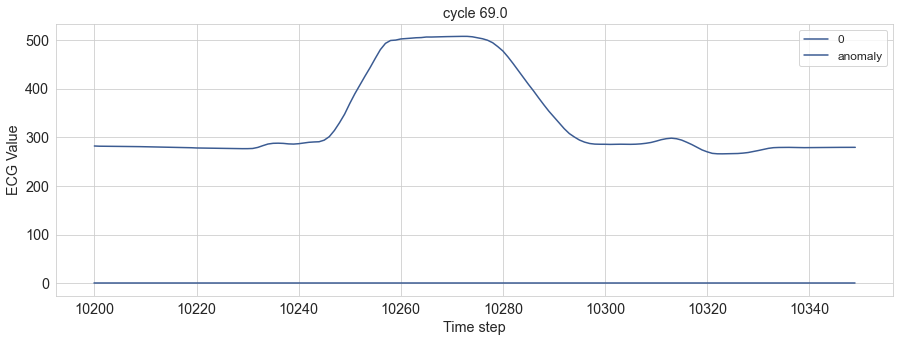

<Figure size 720x360 with 0 Axes>

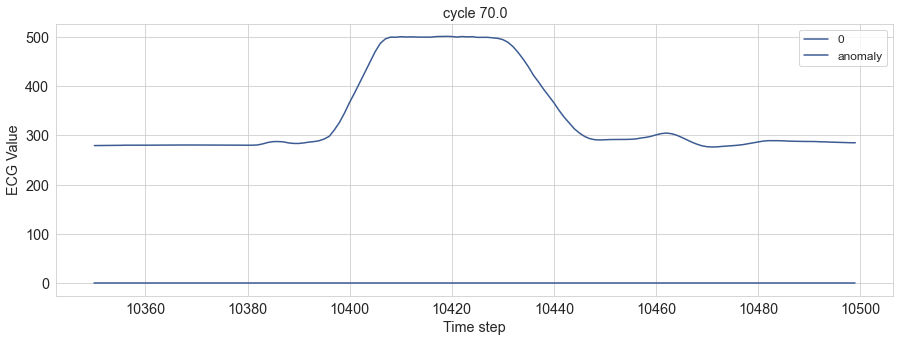

<Figure size 720x360 with 0 Axes>

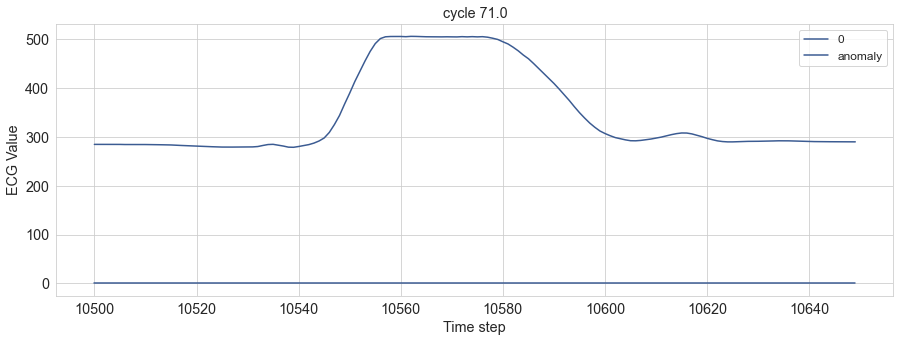

<Figure size 720x360 with 0 Axes>

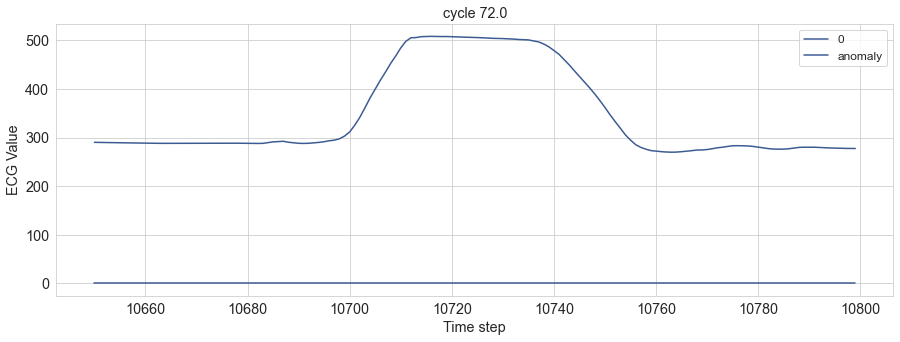

<Figure size 720x360 with 0 Axes>

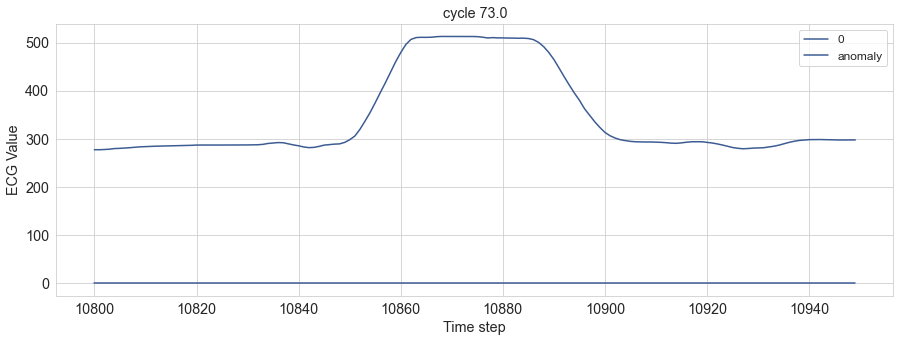

<Figure size 720x360 with 0 Axes>

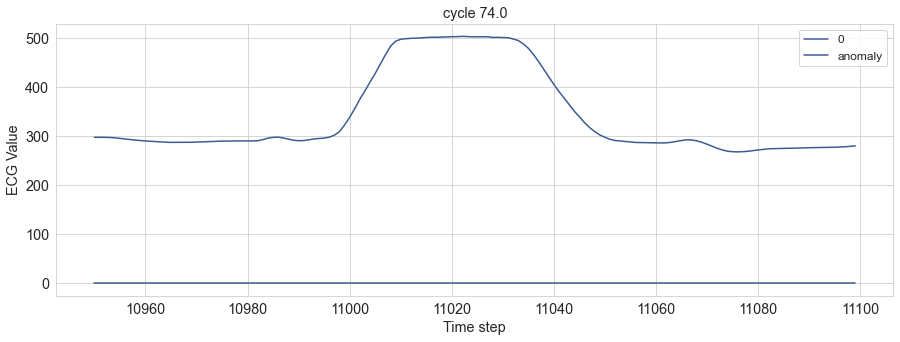

<Figure size 720x360 with 0 Axes>

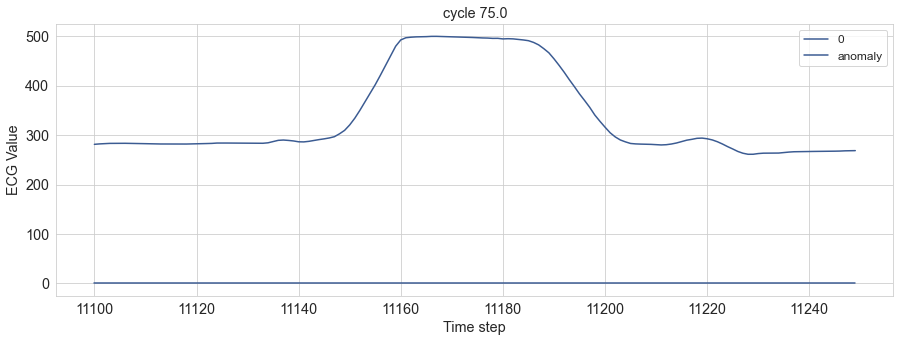

<Figure size 720x360 with 0 Axes>

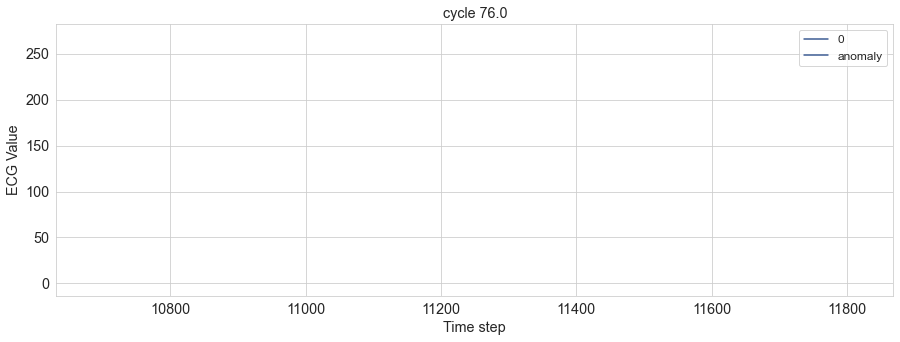

In [144]:
step = 150
for i in range(0,df1.shape[0],step):
    fig = plt.figure(figsize=(10,5))
    tmp = df1[i:i+step].plot(color=sns.xkcd_rgb["denim blue"])
    plt.title("cycle %s"%(i/step +1))
    plt.xlabel('Time step')
    plt.ylabel('ECG Value')
    plt.show()

In [145]:
 df1 = df1.rename(columns={0: 'values_1'})

In [146]:
step = 150
anomaly_sample = [3,15,16,17,19,49,53,57,58,59]
validation1_sample = [20,21,22,23,24,25,26,27,28,29,30]
validation2_sample = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
test_sample = [10,11,12,13,14,15,16,17,18,19,20,49,50,51,52,53,54,55,56,57,58,59]
# redundant_sample = [1,2,4,5,18,76]
redundant_sample = [76]
df_train_list = []
df_valid1_list = []
df_valid2_list = []
df_test_list = []

for i in range(0,df1.shape[0],step):
    sample = i/step +1

    if sample in validation1_sample:
        df_valid1_list.append(df1[i:i+step])  
    if sample in validation2_sample:
        if sample in anomaly_sample:
            df1[i:i+step]['anomaly'] =1
        df_valid2_list.append(df1[i:i+step])
    if sample in test_sample:
        if sample in anomaly_sample:
            df1[i:i+step]['anomaly'] =1
        df_test_list.append(df1[i:i+step])
    if sample not in anomaly_sample:
        if sample not in redundant_sample:
            print(sample)
            df_train_list.append(df1[i:i+step])

print(len(df_train_list))
print(len(df_valid1_list))
print(len(df_valid2_list))
print(len(df_test_list))

1.0
2.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
18.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
50.0
51.0
52.0
54.0
55.0
56.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
65
11
20
22
/Users/tranlonghoai/Desktop/lstm_anomaly_thesis-master/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tranlonghoai/Desktop/lstm_anomaly_thesis-master/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [147]:
df_train = pd.concat(df_train_list)
df_test = pd.concat(df_test_list)
df_validation1 = pd.concat(df_valid1_list)
df_validation2 = pd.concat(df_valid2_list)
df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

Size of train: (9750, 2)
Size of test: (3300, 2)
Size of validation1: (1650, 2)
Size of validation2: (3000, 2)
Total: 17700
Ratio of train: 0.550847
Ratio of test: 0.186441
Ratio of validation1: 0.093220
Ratio of validation2: 0.169492
train


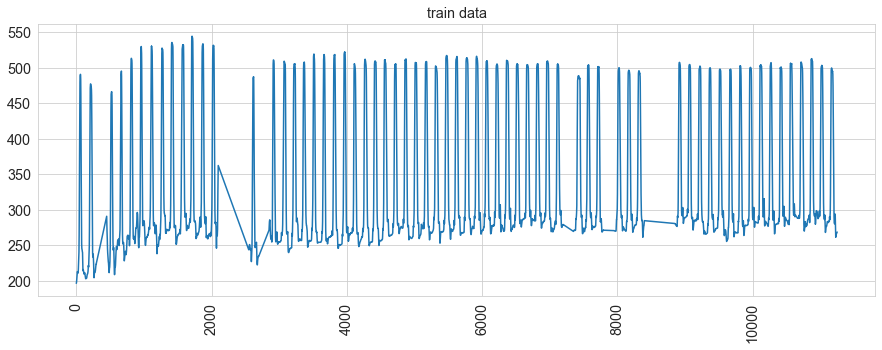

test


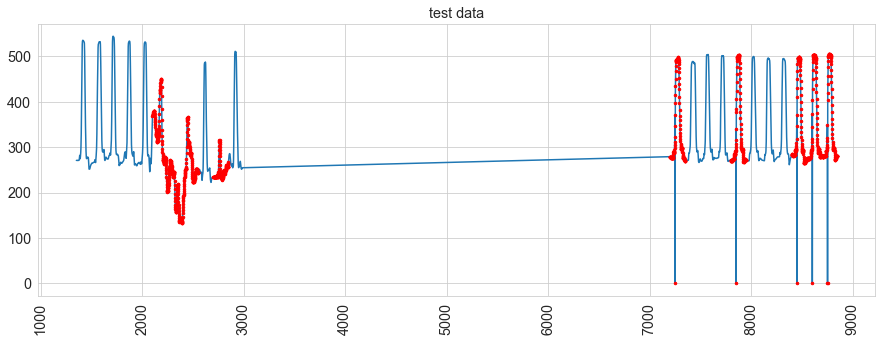

validation1


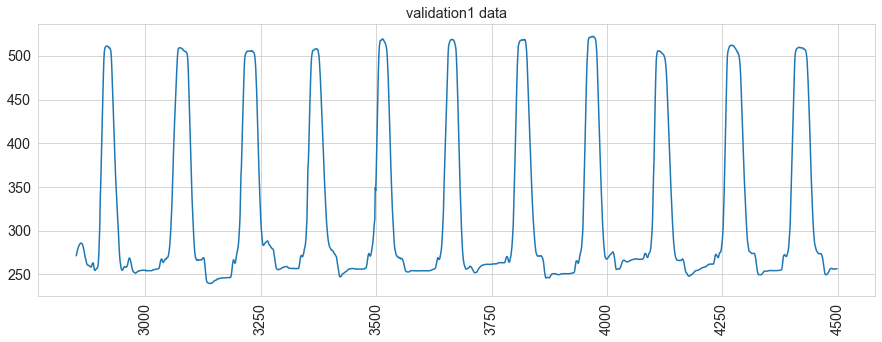

validation2


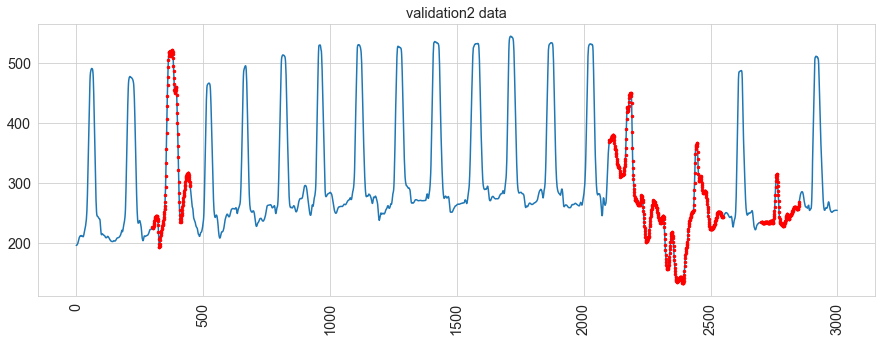

In [148]:
count = 0
for key in df_dict:
    print("Size of %s: %s"%(key,df_dict[key].shape))
    count += df_dict[key].shape[0]
print("Total: %d"%(count))

for key in df_dict:
    print("Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count))

for key in df_dict:
    plt.figure()
    df_tmp = df_dict[key]
    print(key)
    df_tmp['values_1'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        plt.plot(row[0], row[1], 'r.', markersize=5.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [150]:
for key in df_dict:
    np.save("../resources/data/discords/gesture/%s"%(key),df_dict[key])

In [152]:
data_folder = "../resources/data/discords/gesture/"

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print(train_predictions.shape)
print(train_true.shape)

(9685, 1)
(9685,)


In [154]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print(np.shape(validation2_predictions))
print(np.shape(validation2_true))
print(np.shape(validation2_labels))
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print(np.shape(validation2_labels))

(2980, 1)
(2980,)
(2998, 1, 1)
(2998, 1)


In [155]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print(np.shape(test_predictions))
print(np.shape(test_true))
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print(np.shape(test_labels))

(3278, 1)
(3278,)
(3298, 1)


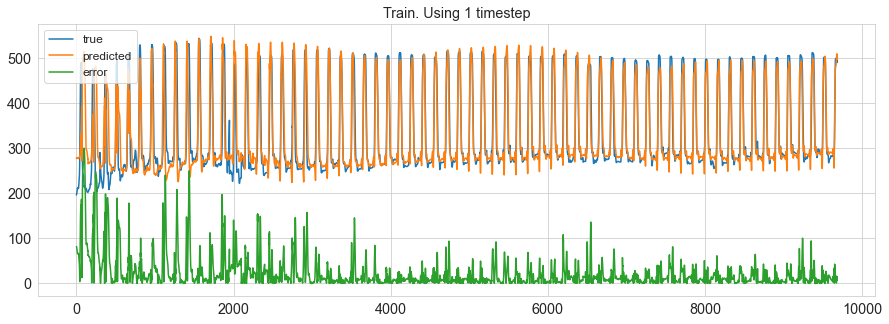

In [156]:
plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")
plt.show()

[-2.05249554]
1874.1158012437668


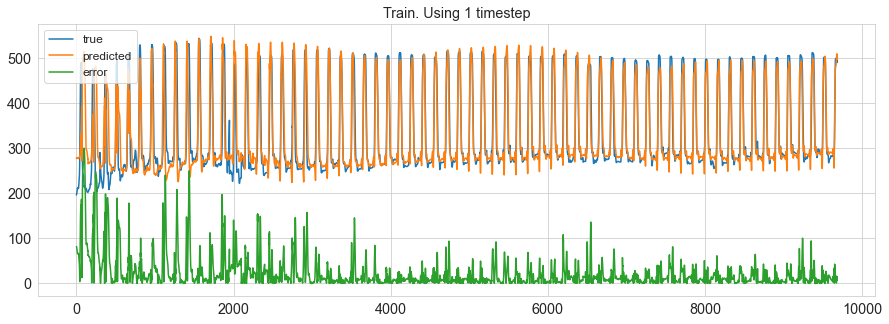

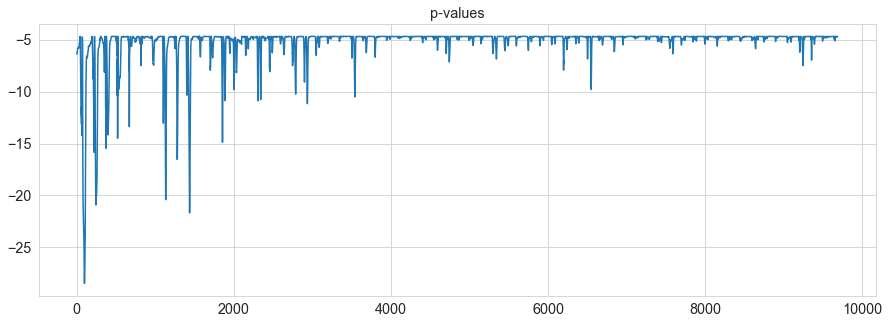

In [157]:
#error vectors
from scipy.stats import norm
from scipy.stats import multivariate_normal

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  train_true -train_predictions[:,i]

mean = np.mean(train_error_vectors, axis=0)
cov = np.cov(train_error_vectors,rowvar=False)
print(mean)
print(cov)
p_values= multivariate_normal.logpdf(train_error_vectors,mean,cov)

plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.title("Train. Using 1 timestep")
plt.legend()

# plt.figure(figsize=(15,5))
# plt.plot(train_true,label='true')
# plt.plot(train_predictions[:,5],label='predicted')
# plt.plot(abs(train_true - train_predictions[:,5]),label='error')
# plt.title("Train. Using 6 timestep")
# plt.legend()

plt.figure(figsize=(15,5))
plt.plot(p_values)
plt.title("p-values")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [158]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  validation2_true -validation2_predictions[:,i]
v2_p_values= multivariate_normal.logpdf( v2_error_vectors,mean,cov)
# v2_true_anomalies = np.where(validation2_labels[:,0]==1)
# print "Validation2. Number True Anomalies: %d"%(np.shape(v2_true_anomalies)[1])
# print "Validation2. Location of anomalies: %s"%(v2_true_anomalies)
# print "validation2. True anomalies: %s"%(validation2_true[v2_true_anomalies])
# v2_thresholds =v2_p_values[v2_true_anomalies]
# print "validation2. p-values at true anomalies: %s"%(v2_thresholds)

# print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_p_values= multivariate_normal.logpdf( test_error_vectors,mean,cov)
test_true_anomalies = np.where(test_labels[:,0]==1)
# print "Test. Number True Anomalies in: %d"%(np.shape(test_true_anomalies)[1])
# print "Test. Location of anomalies: %s"%(test_true_anomalies)
# print "Test. True anomalies: %s"%(test_true[test_true_anomalies])
# test_thresholds = test_p_values[test_true_anomalies]
# print "Test. p-values at true anomalies: %s"%(test_thresholds)

[  50   51   52   53   54   55   56   70   71   72   73   74   75   76
   77   78   79   80   81   82   83   84   85   86   87   88   89   90
   91   92   93   94   95   96   97   98   99  100  101  232  233  234
  235  236  237  238  239  240  241  242  243  244  245  246  247  540
  541  542  543  544  678  679  680  681  682  683  684  685  953  954
 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287
 1288 1289 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432 1433 1434
 1435 1575 1576 1577 1578 1579 1580 1581 1582 1583 1584 1585 1586 1587
 1588 1589 1590 1591 1592 1593 2003 2004 2005 2006 2007 2156 2157 2158
 2159 2160 2161 2162 2163 2164 2165 2166 2302 2303 2304 2305 2306 2307
 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318 2319 2320 2321
 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332 2333 2334 2335
 2336 2337 2338 2339 2340 2341 2342 2343 2357 2358 2359 2360 2361 2362
 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374 2375 2376
 2377 

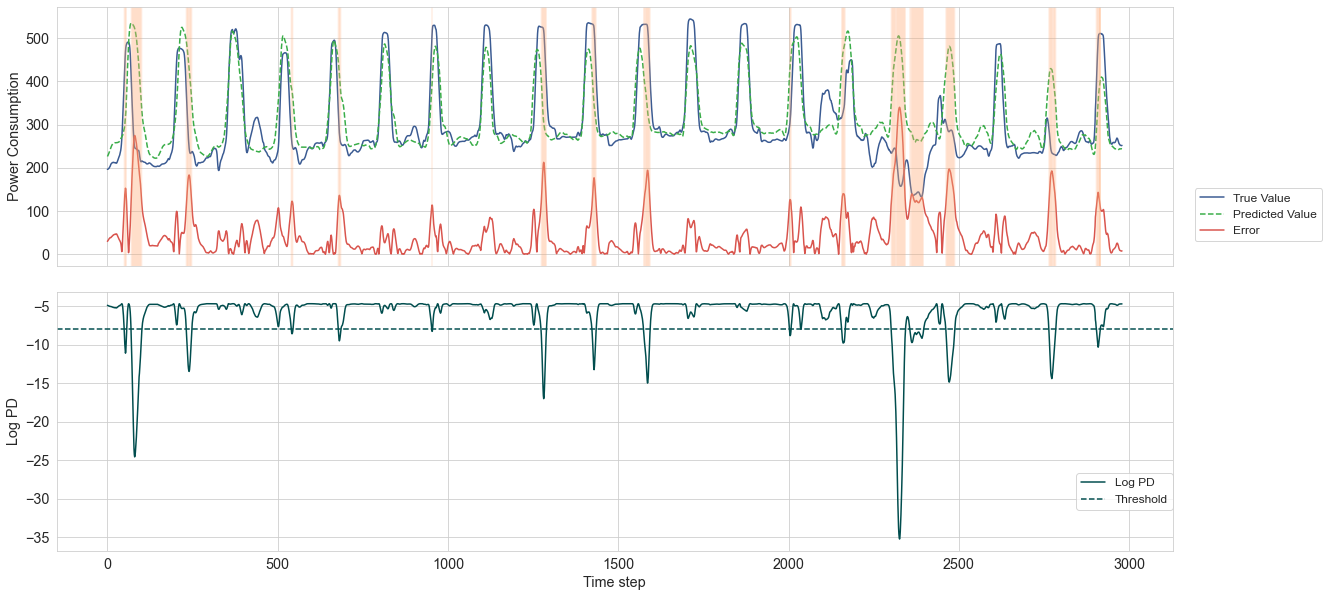

In [163]:
threshold_v2 = -8

f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.1)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)
ax1 = plt.subplot(211)
ax1.plot(validation2_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(validation2_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(validation2_true - validation2_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
for column in v2_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=.1)
print(v2_below_threshold[0])
ax1.axvline(x=v2_below_threshold[0][-1],color=sns.xkcd_rgb["peach"],alpha=.5)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1.02,.3),borderaxespad=0.,frameon=True)
plt.ylabel("Power Consumption")
#plt.title("Validation2. Using 1 timestep")


#plot v2 log PD
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(v2_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .3), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("Validation2 p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('power_v2.pdf')
pp.savefig(f)
pp.close()

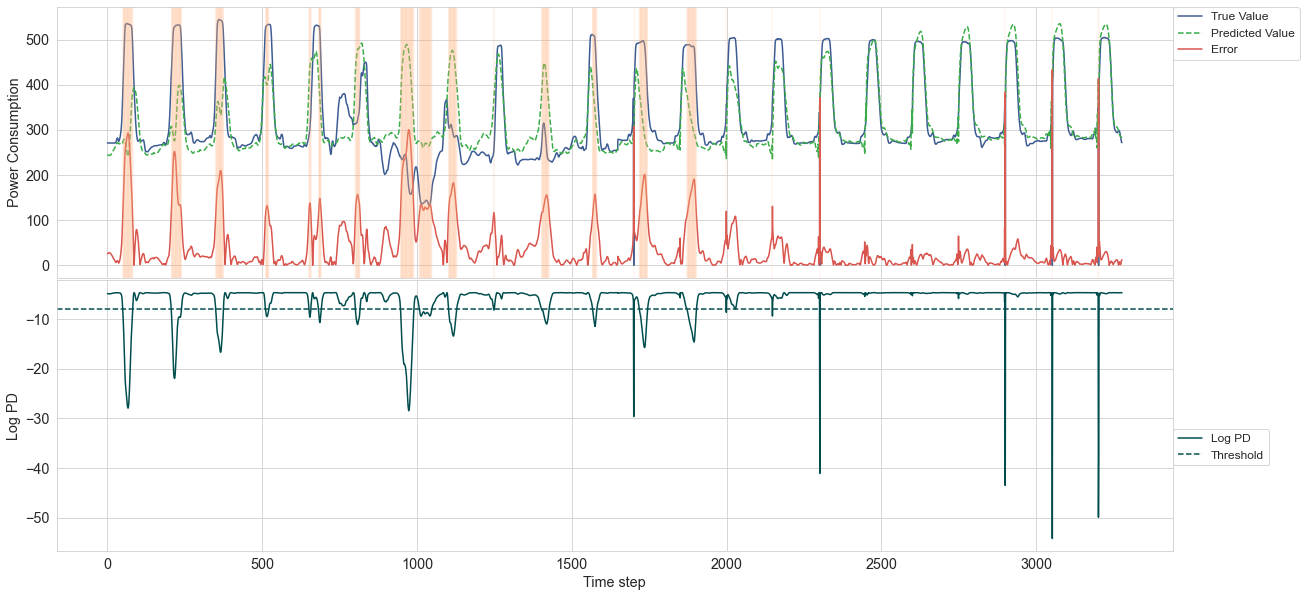

In [164]:
test_below_threshold = np.where(test_p_values <= threshold_v2)
#plot test data
f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(test_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(test_true - test_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=0.1)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, 1), borderaxespad=0.,frameon=True)
plt.ylabel("Power Consumption")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('power_test.pdf')
pp.savefig(f)
pp.close()